
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    System 2 - Homework 1<br>
<font color=2565AE size=5>
    Spring 2025<br>
<font color=3C99D size=5>
    NeuroSymbolic <br>


---

### Student Number = 401105815

### Full Name = Radin Cheraghi

---

# 🚀 Neurosymbolic Exercise  
## **Generating Programs with Seq2Seq Models**  
### 🌟 **Why It Matters**  
Program generation using seq2seq models is a common practice in building up **Neurosymbolic structures**. In this framework:  
- <span style="color:blue">**Programs**</span> act as **symbols**.  
- <span style="color:green">**Seq2Seq models**</span> serve as **neural structures**.  

The program space is a **compositional space**, enabling AI systems to solve a wide range of tasks. Therefore, searching and generating programs using **powerful neural structures** can be seen as a neurosymbolic structure — leading to more **interpretable** and **generalizable** AI systems.  

---

### 🎯 **The Particular Problem**  
In this exercise, you will explore how to generate programs using a sequence-to-sequence (seq2seq) model to solve a **Visual Question Answering (VQA)** task. 




> **VQA** is a challenging task that combines natural language understanding and visual reasoning — the model needs to process an image and a question about the image, then generate a correct answer.


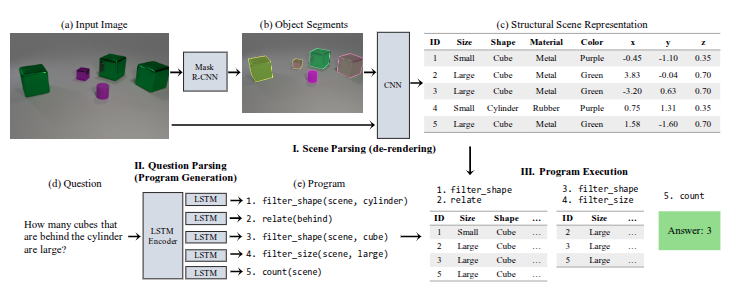





For more details of the Architecture, see [VQA](https://proceedings.neurips.cc/paper_files/paper/2018/file/5e388103a391daabe3de1d76a6739ccd-Paper.pdf)

In this exercise, you will focus on the **program generation** part — **not** processing images to generate scenes. The generated programs will represent the reasoning steps required to answer the question, bridging **neural** and **symbolic** processing — a key aspect of neurosymbolic models.  

---

### 🎯 **Learning Objectives**  
By the end of this assignment, you should be able to:  

✅ **Create and preprocess** a dataset for program generation in the context of VQA.  
   - However, the techniques here can be applied in general contexts.  

✅ **Understand and implement** the following learning strategies to train seq2seq models for producing programs:  
- 🟠 **Supervised Learning** – Train a seq2seq model using ground truth programs.  
- 🔵 **Reinforcement Learning (RL)** – Improve program generation by rewarding programs that produce correct answers.  
- 🟢 **In-Context Learning (ICL) with Large Language Models (LLMs)** – Use examples and prompts to guide LLMs to generate programs without explicit training.  

✅ **Evaluate** the strengths and weaknesses of each approach.  

---
### 🎯 **General Instruction** 

Dear Students, please write clean codes with comments and provide explanation any where about your implementation in comments if necessary. Furthermore, we have some private data to evaluate your trained model on them.

---


### **Getting Familiar with Preprocessing and Dataset Creation**

In this section, you are going to understand the structure of data you are going to work with. Furtheremore, you are going to be familiar with common practice of preprocessing and creating dataset which is going to be used for building a seq2seq model to generate programs(symbols). 

#### Downloding CLEVR Dataset

Please first download the CLEVR Dataset from this link: https://drive.google.com/file/d/1_AtOysdMraIdLbbmAzC2x862Jd7xQDQ7/view?usp=sharing

Then, you must unzip the downloaded file and put it beside this notebook.

#### Questions and Programs

In the following link, you need to print one item of test question dataset and examine its content.

In [1]:
import torch
import random
import numpy as np
import os

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    # For deterministic behavior
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [3]:
import json
PathTestQuestionsDataset =  "CELVR_Dataset/Questions/CLEVR_test_questions.json"

with open(PathTestQuestionsDataset , 'r') as f:
    Questiondata = json.load(f)['questions']

### Print an example in the list of Questiondata
print("Sample Question Entry:")
print(json.dumps(Questiondata[0], indent=4))

Sample Question Entry:
{
    "image_index": 6216,
    "program": [
        {
            "inputs": [],
            "function": "scene",
            "value_inputs": []
        },
        {
            "inputs": [
                0
            ],
            "function": "filter_color",
            "value_inputs": [
                "yellow"
            ]
        },
        {
            "inputs": [
                1
            ],
            "function": "filter_material",
            "value_inputs": [
                "rubber"
            ]
        },
        {
            "inputs": [
                2
            ],
            "function": "unique",
            "value_inputs": []
        },
        {
            "inputs": [
                3
            ],
            "function": "same_shape",
            "value_inputs": []
        },
        {
            "inputs": [
                4
            ],
            "function": "exist",
            "value_inputs": []
        }
    ],
    "qu

#### Scenses

In the following link, you need to print one item of test question dataset and examine its content.

In [3]:
PathTestScensesDataset =  "CELVR_Dataset/Scenses/CLEVR_test_scenes.json"

with open(PathTestScensesDataset , 'r') as f:
    Scensdata = json.load(f)["scenes"]


### Print an example in the list of Scenes
print("Sample Scene Entry:")
print(json.dumps(Scensdata[0], indent=4))

Sample Scene Entry:
{
    "image_index": 0,
    "objects": [
        {
            "color": "brown",
            "size": "large",
            "rotation": 178.92387258999463,
            "shape": "cylinder",
            "3d_coords": [
                -1.4937210083007812,
                -1.9936031103134155,
                0.699999988079071
            ],
            "material": "rubber",
            "pixel_coords": [
                119,
                131,
                10.801968574523926
            ]
        },
        {
            "color": "gray",
            "size": "large",
            "rotation": 243.405459279722,
            "shape": "cube",
            "3d_coords": [
                1.555708646774292,
                -2.104736566543579,
                0.699999988079071
            ],
            "material": "rubber",
            "pixel_coords": [
                198,
                190,
                8.60103988647461
            ]
        },
        {
            "colo

### Preprocessing and Creating Datasets in torch

Here, you need to create a vocabulary of Questions and Programs. Then, using these vocabularies, you need to convert each program and question to a vector. 

#### Train Data

In this cell, we are going to build vocabulary out of the Questions and Programs data. Then, using that vocabulary, we are going to turn each program and question into tensor vector. There are some function implemented in tools/preprocess_questions. You need to see the implementation in this file and implement a code to load the json data and turn each question and program to numpy vector and then, the result should be saved in folder dataH5Files/  

In [4]:
from utils import preprocess_questions
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--mode', default='prefix', choices=['chain', 'prefix', 'postfix'])
parser.add_argument('--input_questions_json', required=True)
parser.add_argument('--input_vocab_json', default='')
parser.add_argument('--expand_vocab', default=0, type=int)
parser.add_argument('--unk_threshold', default=1, type=int)
parser.add_argument('--encode_unk', default=0, type=int)
parser.add_argument('--output_h5_file', required=True)
parser.add_argument('--output_vocab_json', default='')
args_list = ['--input_questions_json', 'CELVR_Dataset/Questions/CLEVR_train_questions.json', '--output_h5_file', 'dataH5Files/clevr_train_questions.h5', '--output_vocab_json', 'dataH5Files/clevr_vocal.json']
args = parser.parse_args(args_list)


# ======== Write the code ========== #
preprocess_questions.main(args)

Loading data
Building vocab
Encoding data
Writing output
(699989, 46)
(699989, 27)


#### Test data

In the following cell, you need apply the same procedure for test data.

In [5]:
args_list = ['--input_questions_json', 'CELVR_Dataset/Questions/CLEVR_test_questions.json', '--output_h5_file', 'dataH5Files/clevr_test_questions.h5', '--output_vocab_json', 'dataH5Files/clevr_vocal.json', '--input_vocab_json', 'dataH5Files/clevr_vocal.json', '--expand_vocab','1']
args = parser.parse_args(args_list)

# ======== Write the code ========== #
preprocess_questions.main(args)

Loading data
Building vocab
Loading vocab
Found 0 new words
Encoding data
Writing output
(119995, 46)
(119995, 27)


In this cell, you need to load the h5 Files and print each vectorized form of one program and quesstion

In [6]:
# ==== Write the code Here ======= #
import h5py

# Path to the train h5 file
h5_file_path = 'dataH5Files/clevr_train_questions.h5'

# Open the h5 file
with h5py.File(h5_file_path, 'r') as f:
    # Load questions and programs
    questions = f['questions'][:]          # shape: (699989, 46)
    programs = f['programs'][:]            # shape: (699989, 27)

    # Print the first vectorized question and program
    print("Vectorized Question [index 0]:")
    print(questions[0])
    print("\nVectorized Program [index 0]:")
    print(programs[0])


Vectorized Question [index 0]:
[ 1  6 85 62 25 45 87 82 53 70 76 33  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]

Vectorized Program [index 0]:
[ 1 26  4 15 24 41  4 21 19 16 24 41  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]


#### Create Dataloader in Torch

In this section, you need to create two dataloaders using the generated files in dataH5Files folder. In the following cell, you see Clevr Question dataset class. You need to use this class to create train and test datasets  

In [4]:
import numpy as np
import h5py
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import utils.utils as utils


class ClevrQuestionDataset(Dataset):

    def __init__(self, question_h5_path, vocab_json, max_samples=None):
        self.max_samples = max_samples
        question_h5 = h5py.File(question_h5_path, 'r')
        self.questions = torch.LongTensor(np.asarray(question_h5['questions'], dtype=np.int64))
        self.image_idxs = np.asarray(question_h5['image_idxs'], dtype=np.int64)
        self.programs, self.answers = None, None
        if 'programs' in question_h5:
            self.programs = torch.LongTensor(np.asarray(question_h5['programs'], dtype=np.int64))
        if 'answers' in question_h5:
            self.answers = np.asarray(question_h5['answers'], dtype=np.int64)
        self.vocab = utils.load_vocab(vocab_json)

    def __len__(self):
        if self.max_samples:
            return min(self.max_samples, len(self.questions))
        else:
            return len(self.questions)

    def __getitem__(self, idx):
        if idx >= len(self):
            raise ValueError('index %d out of range (%d)' % (idx, len(self)))
        question = self.questions[idx]
        image_idx = self.image_idxs[idx]
        program = -1
        answer = -1
        if self.programs is not None:
            program = self.programs[idx] 
        if self.answers is not None:
            answer = self.answers[idx]
        return question, program, answer, image_idx



# ===============================Complete the code =====================
train_h5_path = 'dataH5Files/clevr_train_questions.h5'
test_h5_path = 'dataH5Files/clevr_test_questions.h5'
vocab_json_path = 'dataH5Files/clevr_vocal.json'

# Hyperparameters
batch_size = 64  # Feel free to change this

# Create dataset instances
full_train_dataset = ClevrQuestionDataset(train_h5_path, vocab_json_path)
train_dataset = ClevrQuestionDataset(train_h5_path, vocab_json_path, max_samples=300)
test_dataset = ClevrQuestionDataset(test_h5_path, vocab_json_path)

# Create DataLoaders
data_loader = DataLoader(full_train_dataset, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Let's check a single batch
for questions, programs, answers, image_idxs in train_loader:
    print("Batch Shapes:")
    print("Questions:", questions.shape)
    print("Programs:", programs.shape)
    print("Answers:", answers.shape)
    print("Image Indexes:", image_idxs.shape)
    break

print("Number of batches in train_loader:", len(train_loader))

print("Number of batches in test_loader:", len(test_loader))


Batch Shapes:
Questions: torch.Size([64, 46])
Programs: torch.Size([64, 27])
Answers: torch.Size([64])
Image Indexes: torch.Size([64])
Number of batches in train_loader: 5
Number of batches in test_loader: 1875


---
### Create Executor

In the neurosymbolic structure, we usually need an environment to work with symbols and interpert them. Here, the symbols are programs. Therefore, we need to build up an environment to run the programs and produce their results. In the following, we are going to see an example of this environment and work with it. 

In [18]:
from utils.clevr_executor import ClevrExecutor
## Create Executor for running a program on scene.
executor = ClevrExecutor(train_scene_json='CELVR_Dataset/Scenses/CLEVR_train_scenes.json', val_scene_json='CELVR_Dataset/Scenses/CLEVR_test_scenes.json', vocab_json='dataH5Files/clevr_vocal.json')


In the following cell, you are going to give a ground truth program for a particular question to the executor and take the answer. Then, you need to compare the ground truth answer with the answer returned from the executor.  

In [5]:
import json
from utils.clevr_executor import ClevrExecutor
## Load Vocab data, you need to access to answer_token  
vocab_json_path = 'dataH5Files/clevr_vocal.json'
with open(vocab_json_path , 'r') as f:
    vocab_json = json.load(f)
    
if 'program_idx_to_token' not in vocab_json:
    vocab_json['program_idx_to_token'] = {
        v: k for k, v in vocab_json['program_token_to_idx'].items()
    }
if 'question_idx_to_token' not in vocab_json:
    vocab_json['question_idx_to_token'] = {
        v: k for k, v in vocab_json['question_token_to_idx'].items()
    }


executor = ClevrExecutor(train_scene_json='CELVR_Dataset/Scenses/CLEVR_train_scenes.json', val_scene_json='CELVR_Dataset/Scenses/CLEVR_test_scenes.json', vocab_json='dataH5Files/clevr_vocal.json')
## Load the vectorized form of programs
question_h5_path = 'dataH5Files/clevr_train_questions.h5'

question_h5 = h5py.File(question_h5_path, 'r')

# ====================== Complete the code =============================
index = 27

answer_idx_to_token = {int(v): k for k, v in vocab_json['answer_token_to_idx'].items()}
program_idx_to_token = {int(v): k for k, v in vocab_json['program_token_to_idx'].items()}
# Get vectorized program and image index
programs = question_h5['programs'][:]     # (699989, 27)
answers = question_h5['answers'][:]       # (699989,)
image_idxs = question_h5['image_idxs'][:] # (699989,)

program_vec = programs[index]
image_idx = image_idxs[index]
true_answer_idx = answers[index]
### Getting true Answer From Dataset
decoded_true_answer = answer_idx_to_token[true_answer_idx]


### Getting Answer From Excutor 
#hint you need to call exector.run() with particular input
predicted_answer = executor.run(program_vec, image_idx, 'train')

### Comparing the true answer and the answer of the excutor
print("Program Index:", index)
print("Image Index:", image_idx)
print("Ground Truth Answer:", decoded_true_answer)
print("Executor Answer:", predicted_answer)

# ✅ Comparison
print("\nMatch:", decoded_true_answer == predicted_answer)

Program Index: 27
Image Index: 2
Ground Truth Answer: cube
Executor Answer: cube

Match: True


In [23]:
print(program_vec)
print(program_idx_to_token)
print(image_idx)
print(executor.run(program_vec, image_idx, 'train'))

[ 1 31 43 27 35 43 23 19 14 41 33 43 19 24 41  2  0  0  0  0  0  0  0  0
  0  0  0]
{0: '<NULL>', 1: '<START>', 2: '<END>', 3: '<UNK>', 4: 'count', 5: 'equal_color', 6: 'equal_integer', 7: 'equal_material', 8: 'equal_shape', 9: 'equal_size', 10: 'exist', 11: 'filter_color[blue]', 12: 'filter_color[brown]', 13: 'filter_color[cyan]', 14: 'filter_color[gray]', 15: 'filter_color[green]', 16: 'filter_color[purple]', 17: 'filter_color[red]', 18: 'filter_color[yellow]', 19: 'filter_material[metal]', 20: 'filter_material[rubber]', 21: 'filter_shape[cube]', 22: 'filter_shape[cylinder]', 23: 'filter_shape[sphere]', 24: 'filter_size[large]', 25: 'filter_size[small]', 26: 'greater_than', 27: 'intersect', 28: 'less_than', 29: 'query_color', 30: 'query_material', 31: 'query_shape', 32: 'query_size', 33: 'relate[behind]', 34: 'relate[front]', 35: 'relate[left]', 36: 'relate[right]', 37: 'same_color', 38: 'same_material', 39: 'same_shape', 40: 'same_size', 41: 'scene', 42: 'union', 43: 'unique'}
2
cub

---
### **Train Strategies** 

#### Train Seq2Seq Model using Transformer and LSTM
**Now you are fimiliar with data and you have created torch dataset for test and train. Furthermore, you know how to work with the program executor and evaluate its results. Therefore, you are ready for implementing training paradigm. So lets dive into the training paradigms** 

##### **LSTM**

In this section, you need to develope an LSTM bidirectional Architecture both for encoder and decoder part. Before continue, it is better to read the mathematical description of Question Parser Architecture in [VQA](https://proceedings.neurips.cc/paper_files/paper/2018/file/5e388103a391daabe3de1d76a6739ccd-Paper.pdf). In the following, you are going to define encoder, decoder and the attention layer applied in the decoder part. 

For the encoder part, you need to use LSTM in the forward function. For the decoder part, in addition to implementing the forward function, you need to imlement a function to sample the progrms(symbols), given the encoder output. you are going to use this in the REINFORCE algorithm. 

**Please fill the following code in an interpretable way with the meaningful comments**  

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class BaseRNN(nn.Module):
    """Base RNN module"""
    
    def __init__(self, vocab_size, max_len, hidden_size, input_dropout_p, 
                 dropout_p, n_layers, rnn_cell):
        super(BaseRNN, self).__init__()
        
        self.vocab_size = vocab_size
        self.max_len = max_len
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.input_dropout_p = input_dropout_p
        self.dropout_p = dropout_p

        if rnn_cell == 'lstm':
            self.rnn_cell = nn.LSTM
        elif rnn_cell == 'gru':
            self.rnn_cell = nn.GRU
        else:
            raise ValueError('Unsupported RNN Cell: %s' % rnn_cell)

        self.input_dropout = nn.Dropout(p=input_dropout_p)

    def forward(self, *args, **kwargs):
        raise NotImplementedError()

class Encoder(BaseRNN):
    """Encoder RNN module"""
    
    def __init__(self, vocab_size, max_len, word_vec_dim, hidden_size, n_layers,
                 input_dropout_p=0, dropout_p=0, bidirectional=False, rnn_cell='lstm',
                 variable_lengths=False, word2vec=None, fix_embedding=False):
        super(Encoder, self).__init__(vocab_size, max_len, hidden_size, input_dropout_p, dropout_p, n_layers, rnn_cell)
        self.variable_lengths = variable_lengths
        if word2vec is not None:
            assert word2vec.size(0) == vocab_size
            self.word_vec_dim = word2vec.size(1)
            self.embedding = nn.Embedding(vocab_size, self.word_vec_dim)
            self.embedding.weight = nn.Parameter(word2vec)
        else:
            self.word_vec_dim = word_vec_dim
            self.embedding = nn.Embedding(vocab_size, word_vec_dim)
        if fix_embedding:
            self.embedding.weight.requires_grad = False
        
        self.rnn = self.rnn_cell(self.word_vec_dim, hidden_size, n_layers, 
                                 batch_first=True, bidirectional=bidirectional, dropout=dropout_p)
     
     
    # ==================== Complete the Code(Begin) ====================== #
    def forward(self, input_var, input_lengths=None):
        """
        Encode input sequences using a bidirectional (or uni-directional) LSTM.
        Returns the full sequence of hidden states (for attention), and the final hidden state.
        """
        embedded = self.input_dropout(self.embedding(input_var))  # (batch, seq_len, embed_dim)
        
        if self.variable_lengths and input_lengths is not None:
            # Pack padded sequence for efficient RNN processing
            embedded = nn.utils.rnn.pack_padded_sequence(embedded, input_lengths, batch_first=True, enforce_sorted=False) # TODO check enforce_sorted

        output, hidden = self.rnn(embedded)

        if self.variable_lengths and input_lengths is not None:
            # Unpack the sequence
            output, _ = nn.utils.rnn.pad_packed_sequence(output, batch_first=True)

        return output, hidden  # output = encoder_outputs, hidden = (h_n, c_n)
    # ==================== Complete the Code(End) ====================== #


class Decoder(BaseRNN):
    """Decoder RNN module
    To do: add docstring to methods
    """
    
    def __init__(self, vocab_size, max_len, word_vec_dim, hidden_size,
                 n_layers, start_id=1, end_id=2, rnn_cell='lstm',
                 bidirectional=False, input_dropout_p=0,
                 dropout_p=0, use_attention=False):
        super(Decoder, self).__init__(vocab_size, max_len, hidden_size, 
                                      input_dropout_p, dropout_p, n_layers, rnn_cell)

        self.max_length = max_len
        self.output_size = vocab_size
        self.word_vec_dim = word_vec_dim
        self.bidirectional_encoder = bidirectional

        self.decoder_hidden_size = hidden_size
        self.encoder_output_size = hidden_size * 2 if bidirectional else hidden_size

        self.use_attention = use_attention
        self.start_id = start_id
        self.end_id = end_id

        self.embedding = nn.Embedding(self.output_size, self.word_vec_dim)
        self.rnn = self.rnn_cell(self.word_vec_dim, self.decoder_hidden_size, n_layers, batch_first=True, dropout=dropout_p) # TODO: check hidden size
        self.out_linear = nn.Linear(self.decoder_hidden_size, self.output_size)
        if use_attention:
            self.attention = Attention(self.decoder_hidden_size)
            if bidirectional:
                self.encoder_projection = nn.Linear(self.encoder_output_size, self.decoder_hidden_size)

   
    # =========================== Complete the code(Begin) =============================== #
    def forward(self, y, encoder_outputs, encoder_hidden):
        """
        Forward pass for training with teacher forcing.
        y: target sequence (batch, seq_len)
        encoder_outputs: outputs from encoder LSTM (batch, enc_seq_len, hidden)
        encoder_hidden: final encoder hidden state (tuple if LSTM)
        """
        embedded = self.input_dropout(self.embedding(y))  # (batch, seq_len, embed_dim)
        decoder_output, decoder_hidden = self.rnn(embedded, encoder_hidden)  # (batch, seq_len, hidden)

        if self.use_attention:
            if self.bidirectional_encoder:
                encoder_outputs = self.encoder_projection(encoder_outputs)
            decoder_output, _ = self.attention(decoder_output, encoder_outputs)

        logits = self.out_linear(decoder_output)  # (batch, seq_len, vocab_size)
        return logits, decoder_hidden
    
    
    def forward_sample(self, encoder_outputs, encoder_hidden, reinforce_sample=False):
        """
        Sampling function for REINFORCE.
        Returns:
        - output_symbols: sampled tokens (batch, max_len)
        - output_logprobs: log-probs of selected tokens (batch, max_len)
        """
        batch_size = encoder_outputs.size(0)
        decoder_input = torch.LongTensor([self.start_id] * batch_size).to(encoder_outputs.device)
        decoder_input = decoder_input.unsqueeze(1)  # (batch, 1)
        decoder_hidden = encoder_hidden
        output_symbols = []
        output_logprobs = []

        if self.use_attention and self.bidirectional_encoder:
            encoder_outputs = self.encoder_projection(encoder_outputs)
            
        for t in range(self.max_length):
            embedded = self.embedding(decoder_input)  # (batch, 1, embed_dim)
            decoder_output, decoder_hidden = self.rnn(embedded, decoder_hidden)  # (batch, 1, hidden)

            if self.use_attention:
                decoder_output, _ = self.attention(decoder_output, encoder_outputs)  # (batch, 1, hidden)

            logits = self.out_linear(decoder_output.squeeze(1))  # (batch, vocab_size)
            probs = F.softmax(logits, dim=-1)
            log_probs = F.log_softmax(logits, dim=-1)

            if reinforce_sample:
                # Sample from distribution (for REINFORCE)
                sampled = torch.multinomial(probs, 1).squeeze(1)
            else:
                # Greedy decoding
                sampled = torch.argmax(probs, dim=1)

            output_symbols.append(sampled)
            output_logprobs.append(log_probs.gather(1, sampled.unsqueeze(1)).squeeze(1))  # log prob of selected token

            decoder_input = sampled.unsqueeze(1)  # Next input

        # Stack results across time steps
        output_symbols = torch.stack(output_symbols, dim=1)      # (batch, max_len)
        output_logprobs = torch.stack(output_logprobs, dim=1)    # (batch, max_len)

        return output_symbols, output_logprobs

class Attention(nn.Module):
    """Attention layer"""
        
    def __init__(self, dim, use_weight=False, hidden_size=512):
        super(Attention, self).__init__()
        self.use_weight = use_weight
        self.hidden_size = hidden_size
        if use_weight:
            print('| using weighted attention layer')
            self.attn_weight = nn.Linear(hidden_size, hidden_size, bias=False)
        self.linear_out = nn.Linear(2*dim, dim)

    def forward(self, output, context):
        """
        - args
        output : Tensor  
            decoder output, dim (batch_size, output_size, hidden_size)
        context : Tensor
            context vector from encoder, dim (batch_size, input_size, hidden_size)
        - returns
        output : Tensor
            attention layer output, dim (batch_size, output_size, hidden_size)
        attn : Tensor
            attention map, dim (batch_size, output_size, input_size)
        """
        batch_size = output.size(0)
        hidden_size = output.size(2)
        input_size = context.size(1)

        if self.use_weight:
            output = self.attn_weight(output.contiguous().view(-1, hidden_size)).view(batch_size, -1, hidden_size)

        attn = torch.bmm(output, context.transpose(1, 2))
        attn = F.softmax(attn.view(-1, input_size), dim=1).view(batch_size, -1, input_size) # (batch_size, output_size, input_size)

        mix = torch.bmm(attn, context) # (batch_size, output_size, hidden_size)
        comb = torch.cat((mix, output), dim=2) # (batch_size, output_size, 2*hidden_size)
        output = F.tanh(self.linear_out(comb.view(-1, 2*hidden_size)).view(batch_size, -1, hidden_size)) # (batch_size, output_size, hidden_size)

        return output, attn

In the following, you should implement the supervised training strategy. For the training strategy, you should use the next token prediction loss. To implement this, you can use torch.nn.LLLoss. Some configurations of training strategies for supervised setting can be found in the article [VQA](https://proceedings.neurips.cc/paper_files/paper/2018/file/5e388103a391daabe3de1d76a6739ccd-Paper.pdf). 

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import tqdm

class TrainerSupervised():
    """Trainer"""

    def __init__(self, opt, train_loader, val_loader, model, executor):

        self.opt = opt
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model
        self.executor = executor
        
        self.num_iters = opt.get('num_iters', 2000)
        self.run_dir = opt.get('run_dir', './logs')
        self.reinforce = False  # supervised mode
        self.criterion = nn.CrossEntropyLoss(ignore_index=0)  # ignore <NULL> padding token
        self.test_accuracies = []
        #===================== Configure the optimizer Set visualization Setting======================
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=opt.get('lr', 7e-4))  # as in the paper

        os.makedirs(self.run_dir, exist_ok=True)

    #===================== Complete code(Begin) ================================ 
    def train(self):
        training_mode = 'reinforce' if self.reinforce else 'seq2seq'
        print('| start training %s, running in directory %s' % (training_mode, self.run_dir))
        t = 0
        epoch = 0
        while t < self.num_iters:
            epoch += 1
            self.model.train()
            for x, y, ans, idx in self.train_loader:
                t += 1

                x = x.to(self.model.device)
                y = y.to(self.model.device)
                loss, reward = None, None
                self.model.set_input(x, y)

                # === Forward pass (logits: (batch, seq_len, vocab))
                self.optimizer.zero_grad()
                logits = self.model.forward()  # decoder output

                # === Shift target for next-token prediction
                target = y[:, 1:].contiguous()            # skip <START>
                output = logits[:, :-1, :].contiguous()   # predict up to <END>
                #===================== Calculate the loss ======================
                loss = self.criterion(output.view(-1, output.size(-1)), target.view(-1))
                loss.backward()
                self.optimizer.step()

                # === Logging
                if t % 100 == 0:
                    print(f"[Iteration {t}/{self.num_iters}] Loss: {loss.item():.4f}")

                if t >= self.num_iters:
                    break
            if epoch % 20 == 0:
                acc = self.evaluate_on_test()
                self.test_accuracies.append(acc)
                print(f"Epoch {epoch}: Test Accuracy = {acc:.2f}%")
        
        acc_path = os.path.join(self.run_dir, 'test_accuracies.json')
        with open(acc_path, 'w') as f:
            json.dump(self.test_accuracies, f)

        print(f"✅ Test accuracies saved to {acc_path}")
    
    
    def evaluate_on_test(self, max_samples=None):
        self.model.eval()
        correct = 0
        total = 0
        idx_to_answer = {int(v): k for k, v in self.executor.vocab['answer_token_to_idx'].items()}
        idx_to_program = {int(v): k for k, v in self.executor.vocab['program_token_to_idx'].items()}

        with torch.no_grad():
            for i, (x, y, gt_answers, img_idxs) in enumerate(tqdm(self.val_loader)):
                if max_samples and total >= max_samples:
                    break

                x = x.to(self.model.device)
                y = y.to(self.model.device)
                self.model.set_input(x, y)
                logits = self.model()

                pred_programs = torch.argmax(logits, dim=2).cpu()
                for b in range(pred_programs.size(0)):
                    prog = pred_programs[b].tolist()
                    if 2 in prog:
                        prog = prog[:prog.index(2) + 1]

                    img_idx = int(img_idxs[b])
                    true_ans_idx = int(gt_answers[b])
                    true_ans = idx_to_answer[true_ans_idx]

                    try:
                        answer = self.executor.run(prog, index=img_idx, split='val')
                    except:
                        answer = None

                    if answer == true_ans:
                        correct += 1
                    total += 1

        return 100.0 * correct / total if total > 0 else 0.0

**In the following, you need to save the trained model. you are going to use the saved model in the REINFORCE algorithm** 

In [9]:
#==================== Write the code================
import torch
import torch.nn as nn
from tqdm import tqdm

class Seq2SeqModel(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2SeqModel, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def set_input(self, question, program):
        self.question = question.to(self.device)
        self.program = program.to(self.device)

    def forward(self):
        encoder_outputs, encoder_hidden = self.encoder(self.question)

        # === If encoder is bidirectional, reduce to unidirectional shape
        if isinstance(encoder_hidden, tuple):  # LSTM: (h_n, c_n)
            h_n, c_n = encoder_hidden
            h_n = h_n.view(self.encoder.n_layers, 2, -1, self.encoder.hidden_size)
            c_n = c_n.view(self.encoder.n_layers, 2, -1, self.encoder.hidden_size)

            h_n = h_n.sum(1)  # sum forward and backward
            c_n = c_n.sum(1)

            encoder_hidden = (h_n, c_n)
        else:  # GRU
            h_n = encoder_hidden
            h_n = h_n.view(self.encoder.n_layers, 2, -1, self.encoder.hidden_size)
            h_n = h_n.sum(1)
            encoder_hidden = h_n

        decoder_output, _ = self.decoder(self.program, encoder_outputs, encoder_hidden)
        return decoder_output
    

def evaluate(model, test_loader, executor, vocab, device, max_samples=100):
    model.eval()
    correct = 0
    total = 0

    # Token decoders
    idx_to_answer = {int(v): k for k, v in vocab['answer_token_to_idx'].items()}
    idx_to_program = {int(v): k for k, v in vocab['program_token_to_idx'].items()}

    with torch.no_grad():
        for i, (x, y, gt_answers, img_idxs) in enumerate(tqdm(test_loader)):
            if max_samples and total >= max_samples:
                break

            x = x.to(device)
            y = y.to(device)
            model.set_input(x, y)

            # Predict program
            logits = model()
            pred_programs = torch.argmax(logits, dim=2).cpu()  # (batch, seq_len)

            for b in range(pred_programs.size(0)):
                question = x[b].cpu().tolist()
                # Ground truth
                gt_prog = y[b].cpu().tolist()
                if 2 in gt_prog:
                    gt_prog = gt_prog[:gt_prog.index(2) + 1]  # trim at <END>

                # Predicted
                pred_prog = pred_programs[b].tolist()
                if 2 in pred_prog:
                    pred_prog = pred_prog[:pred_prog.index(2) + 1]  # trim at <END>

                # Inputs
                img_idx = int(img_idxs[b])
                true_ans_idx = int(gt_answers[b])
                true_ans = idx_to_answer[true_ans_idx]

                # Run executor
                try:
                    pred_answer = executor.run(pred_prog, index=img_idx, split='val')
                except Exception as e:
                    pred_answer = None
                    print(f"Exec error: {e}\n Pred program: {pred_prog}")

                try:
                    gt_answer = executor.run(gt_prog, index=img_idx, split='val')
                except Exception as e:
                    gt_answer = None
                    print(f"GT Exec error: {e}\n GT program: {gt_prog}")

                # Show decoded programs and answers
                # if total < 20:
                #     decoded_pred = [idx_to_program.get(tok, f"UNK{tok}") for tok in pred_prog]
                #     decoded_gt = [idx_to_program.get(tok, f"UNK{tok}") for tok in gt_prog]
                #     question_tokens = [vocab['question_idx_to_token'].get(t, '') for t in question if t != 0]
                #     question_text = ' '.join(question_tokens)
                #     print(f"❓ Question: {question_text}")
                #     print("\n🧾 Predicted Program:", decoded_pred)
                #     print("📌 Ground Truth Program:", decoded_gt)
                #     print(f"✅ GT Answer (Label): {true_ans}")
                #     print(f"🤖 Predicted Answer: {pred_answer}")
                #     print(f"✅ GT Answer (Executor): {gt_answer}")

                if pred_answer == true_ans:
                    correct += 1
                total += 1
    accuracy = 100.0 * correct / total
    print(f"\n Accuracy on {total} test samples: {accuracy:.2f}%")


In [37]:
# Hyperparameters
vocab_size = len(vocab_json['question_token_to_idx'])
program_vocab_size = len(vocab_json['program_token_to_idx'])
word_vec_dim = 128
hidden_size = 256
n_layers = 1
max_q_len = 46
max_prog_len = 27
use_attention = True

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model components
encoder = Encoder(
    vocab_size=vocab_size,
    max_len=max_q_len,
    word_vec_dim=word_vec_dim,
    hidden_size=hidden_size,
    n_layers=n_layers,
    bidirectional=True,
    input_dropout_p=0.1,
    dropout_p=0.1,
    rnn_cell='lstm'
)

decoder = Decoder(
    vocab_size=program_vocab_size,
    max_len=max_prog_len,
    word_vec_dim=word_vec_dim,
    hidden_size=hidden_size,
    n_layers=n_layers,
    use_attention=use_attention,
    input_dropout_p=0.1,
    dropout_p=0.1,
    bidirectional=True
)


# Full model
model = Seq2SeqModel(encoder, decoder, device).to(device)

# Options for Trainer
opt = {
    'num_iters': 5000,           # adjust as needed
    'lr': 7e-4,
    'run_dir': './logs',
}

# Instantiate trainer
trainer = TrainerSupervised(opt, train_loader, test_loader, model, executor)

# Start training
trainer.train()

torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': trainer.optimizer.state_dict(),
}, f"{opt['run_dir']}/supervised_model.pt")

print("✅ Model saved.")

| start training seq2seq, running in directory ./logs
[Iteration 100/5000] Loss: 1.2274


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:06<00:00, 275.55it/s]


Epoch 20: Test Accuracy = 4.88%
[Iteration 200/5000] Loss: 0.3551


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 259.49it/s]


Epoch 40: Test Accuracy = 33.03%
[Iteration 300/5000] Loss: 0.1034


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 260.46it/s]


Epoch 60: Test Accuracy = 43.58%
[Iteration 400/5000] Loss: 0.0252


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 251.74it/s]


Epoch 80: Test Accuracy = 52.97%
[Iteration 500/5000] Loss: 0.0149


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 254.07it/s]


Epoch 100: Test Accuracy = 52.15%
[Iteration 600/5000] Loss: 0.0355


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 251.63it/s]


Epoch 120: Test Accuracy = 56.14%
[Iteration 700/5000] Loss: 0.0045


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 256.19it/s]


Epoch 140: Test Accuracy = 57.00%
[Iteration 800/5000] Loss: 0.0041


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 252.60it/s]


Epoch 160: Test Accuracy = 58.29%
[Iteration 900/5000] Loss: 0.0127


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 249.35it/s]


Epoch 180: Test Accuracy = 59.71%
[Iteration 1000/5000] Loss: 0.0066


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 251.95it/s]


Epoch 200: Test Accuracy = 59.96%
[Iteration 1100/5000] Loss: 0.0043


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 245.92it/s]


Epoch 220: Test Accuracy = 62.50%
[Iteration 1200/5000] Loss: 0.0036


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 242.77it/s]


Epoch 240: Test Accuracy = 63.71%
[Iteration 1300/5000] Loss: 0.0023


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 253.95it/s]


Epoch 260: Test Accuracy = 63.74%
[Iteration 1400/5000] Loss: 0.0032


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 254.40it/s]


Epoch 280: Test Accuracy = 59.04%
[Iteration 1500/5000] Loss: 0.0012


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 256.61it/s]


Epoch 300: Test Accuracy = 63.60%
[Iteration 1600/5000] Loss: 0.0437


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 244.18it/s]


Epoch 320: Test Accuracy = 61.45%
[Iteration 1700/5000] Loss: 0.0045


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 251.52it/s]


Epoch 340: Test Accuracy = 59.89%
[Iteration 1800/5000] Loss: 0.0012


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 254.05it/s]


Epoch 360: Test Accuracy = 63.50%
[Iteration 1900/5000] Loss: 0.0112


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 247.97it/s]


Epoch 380: Test Accuracy = 63.51%
[Iteration 2000/5000] Loss: 0.0009


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 247.28it/s]


Epoch 400: Test Accuracy = 66.42%
[Iteration 2100/5000] Loss: 0.0006


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 245.14it/s]


Epoch 420: Test Accuracy = 66.82%
[Iteration 2200/5000] Loss: 0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 247.97it/s]


Epoch 440: Test Accuracy = 66.76%
[Iteration 2300/5000] Loss: 0.0004


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 250.10it/s]


Epoch 460: Test Accuracy = 66.68%
[Iteration 2400/5000] Loss: 0.0011


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 252.77it/s]


Epoch 480: Test Accuracy = 66.06%
[Iteration 2500/5000] Loss: 0.0113


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 247.86it/s]


Epoch 500: Test Accuracy = 61.82%
[Iteration 2600/5000] Loss: 0.0154


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 249.67it/s]


Epoch 520: Test Accuracy = 63.80%
[Iteration 2700/5000] Loss: 0.0081


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 248.32it/s]


Epoch 540: Test Accuracy = 63.89%
[Iteration 2800/5000] Loss: 0.0006


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 246.32it/s]


Epoch 560: Test Accuracy = 67.64%
[Iteration 2900/5000] Loss: 0.0004


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 247.35it/s]


Epoch 580: Test Accuracy = 68.16%
[Iteration 3000/5000] Loss: 0.0006


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 256.64it/s]


Epoch 600: Test Accuracy = 65.25%
[Iteration 3100/5000] Loss: 0.0058


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 246.58it/s]


Epoch 620: Test Accuracy = 61.27%
[Iteration 3200/5000] Loss: 0.0012


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 250.33it/s]


Epoch 640: Test Accuracy = 67.33%
[Iteration 3300/5000] Loss: 0.0030


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 251.16it/s]


Epoch 660: Test Accuracy = 66.49%
[Iteration 3400/5000] Loss: 0.0133


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 249.06it/s]


Epoch 680: Test Accuracy = 68.14%
[Iteration 3500/5000] Loss: 0.0012


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 249.18it/s]


Epoch 700: Test Accuracy = 68.25%
[Iteration 3600/5000] Loss: 0.0007


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 246.89it/s]


Epoch 720: Test Accuracy = 71.34%
[Iteration 3700/5000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 247.82it/s]


Epoch 740: Test Accuracy = 72.23%
[Iteration 3800/5000] Loss: 0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 247.97it/s]


Epoch 760: Test Accuracy = 71.74%
[Iteration 3900/5000] Loss: 0.0002


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 249.31it/s]


Epoch 780: Test Accuracy = 72.64%
[Iteration 4000/5000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 250.16it/s]


Epoch 800: Test Accuracy = 72.96%
[Iteration 4100/5000] Loss: 0.0002


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 248.83it/s]


Epoch 820: Test Accuracy = 73.28%
[Iteration 4200/5000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 253.56it/s]


Epoch 840: Test Accuracy = 73.30%
[Iteration 4300/5000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 251.00it/s]


Epoch 860: Test Accuracy = 73.44%
[Iteration 4400/5000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 248.49it/s]


Epoch 880: Test Accuracy = 73.54%
[Iteration 4500/5000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 246.23it/s]


Epoch 900: Test Accuracy = 73.62%
[Iteration 4600/5000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 248.65it/s]


Epoch 920: Test Accuracy = 73.43%
[Iteration 4700/5000] Loss: 0.0004


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 249.07it/s]


Epoch 940: Test Accuracy = 72.74%
[Iteration 4800/5000] Loss: 0.0002


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 248.58it/s]


Epoch 960: Test Accuracy = 73.58%
[Iteration 4900/5000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 246.80it/s]


Epoch 980: Test Accuracy = 74.04%
[Iteration 5000/5000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:07<00:00, 246.62it/s]


Epoch 1000: Test Accuracy = 74.23%
✅ Test accuracies saved to ./logs/test_accuracies.json
✅ Model saved.


In [38]:
vocab_size = len(vocab_json['question_token_to_idx'])
program_vocab_size = len(vocab_json['program_token_to_idx'])
word_vec_dim = 128
hidden_size = 256
n_layers = 1
max_q_len = 46
max_prog_len = 27
use_attention = True

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model components
encoder = Encoder(
    vocab_size=vocab_size,
    max_len=max_q_len,
    word_vec_dim=word_vec_dim,
    hidden_size=hidden_size,
    n_layers=n_layers,
    bidirectional=True,
    input_dropout_p=0.1,
    dropout_p=0.1,
    rnn_cell='lstm'
)

decoder = Decoder(
    vocab_size=program_vocab_size,
    max_len=max_prog_len,
    word_vec_dim=word_vec_dim,
    hidden_size=hidden_size,
    n_layers=n_layers,
    use_attention=use_attention,
    input_dropout_p=0.1,
    dropout_p=0.1,
    bidirectional=True
)

model = Seq2SeqModel(encoder, decoder, device).to(device)

# Load the weights
checkpoint = torch.load('./logs/supervised_model.pt', map_location=device)

model.load_state_dict(checkpoint['model_state_dict'])
print("✅ Model weights loaded successfully.")
model.eval()
evaluate(model, test_loader, executor, vocab_json, device, max_samples=None)


✅ Model weights loaded successfully.


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:13<00:00, 139.88it/s]


 Accuracy on 119995 test samples: 74.23%


In this section, you need to repeat the above procedure but instead using LSTM, you should apply the Transformer model.
The transformer is a deep learning model that has become very popular in recent years for various natural language processing (NLP) tasks such as machine translation, text classification, and text generation.

The transformer was introduced in the paper "Attention Is All You Need" by Vaswani et al. in 2017 [[link](https://arxiv.org/abs/1706.03762)], and it is based on a novel architecture that replaces traditional recurrent neural networks (RNNs) with self-attention mechanisms. This allows the transformer to process entire sequences of input tokens in parallel, rather than sequentially, making it faster and more efficient than RNN-based models.

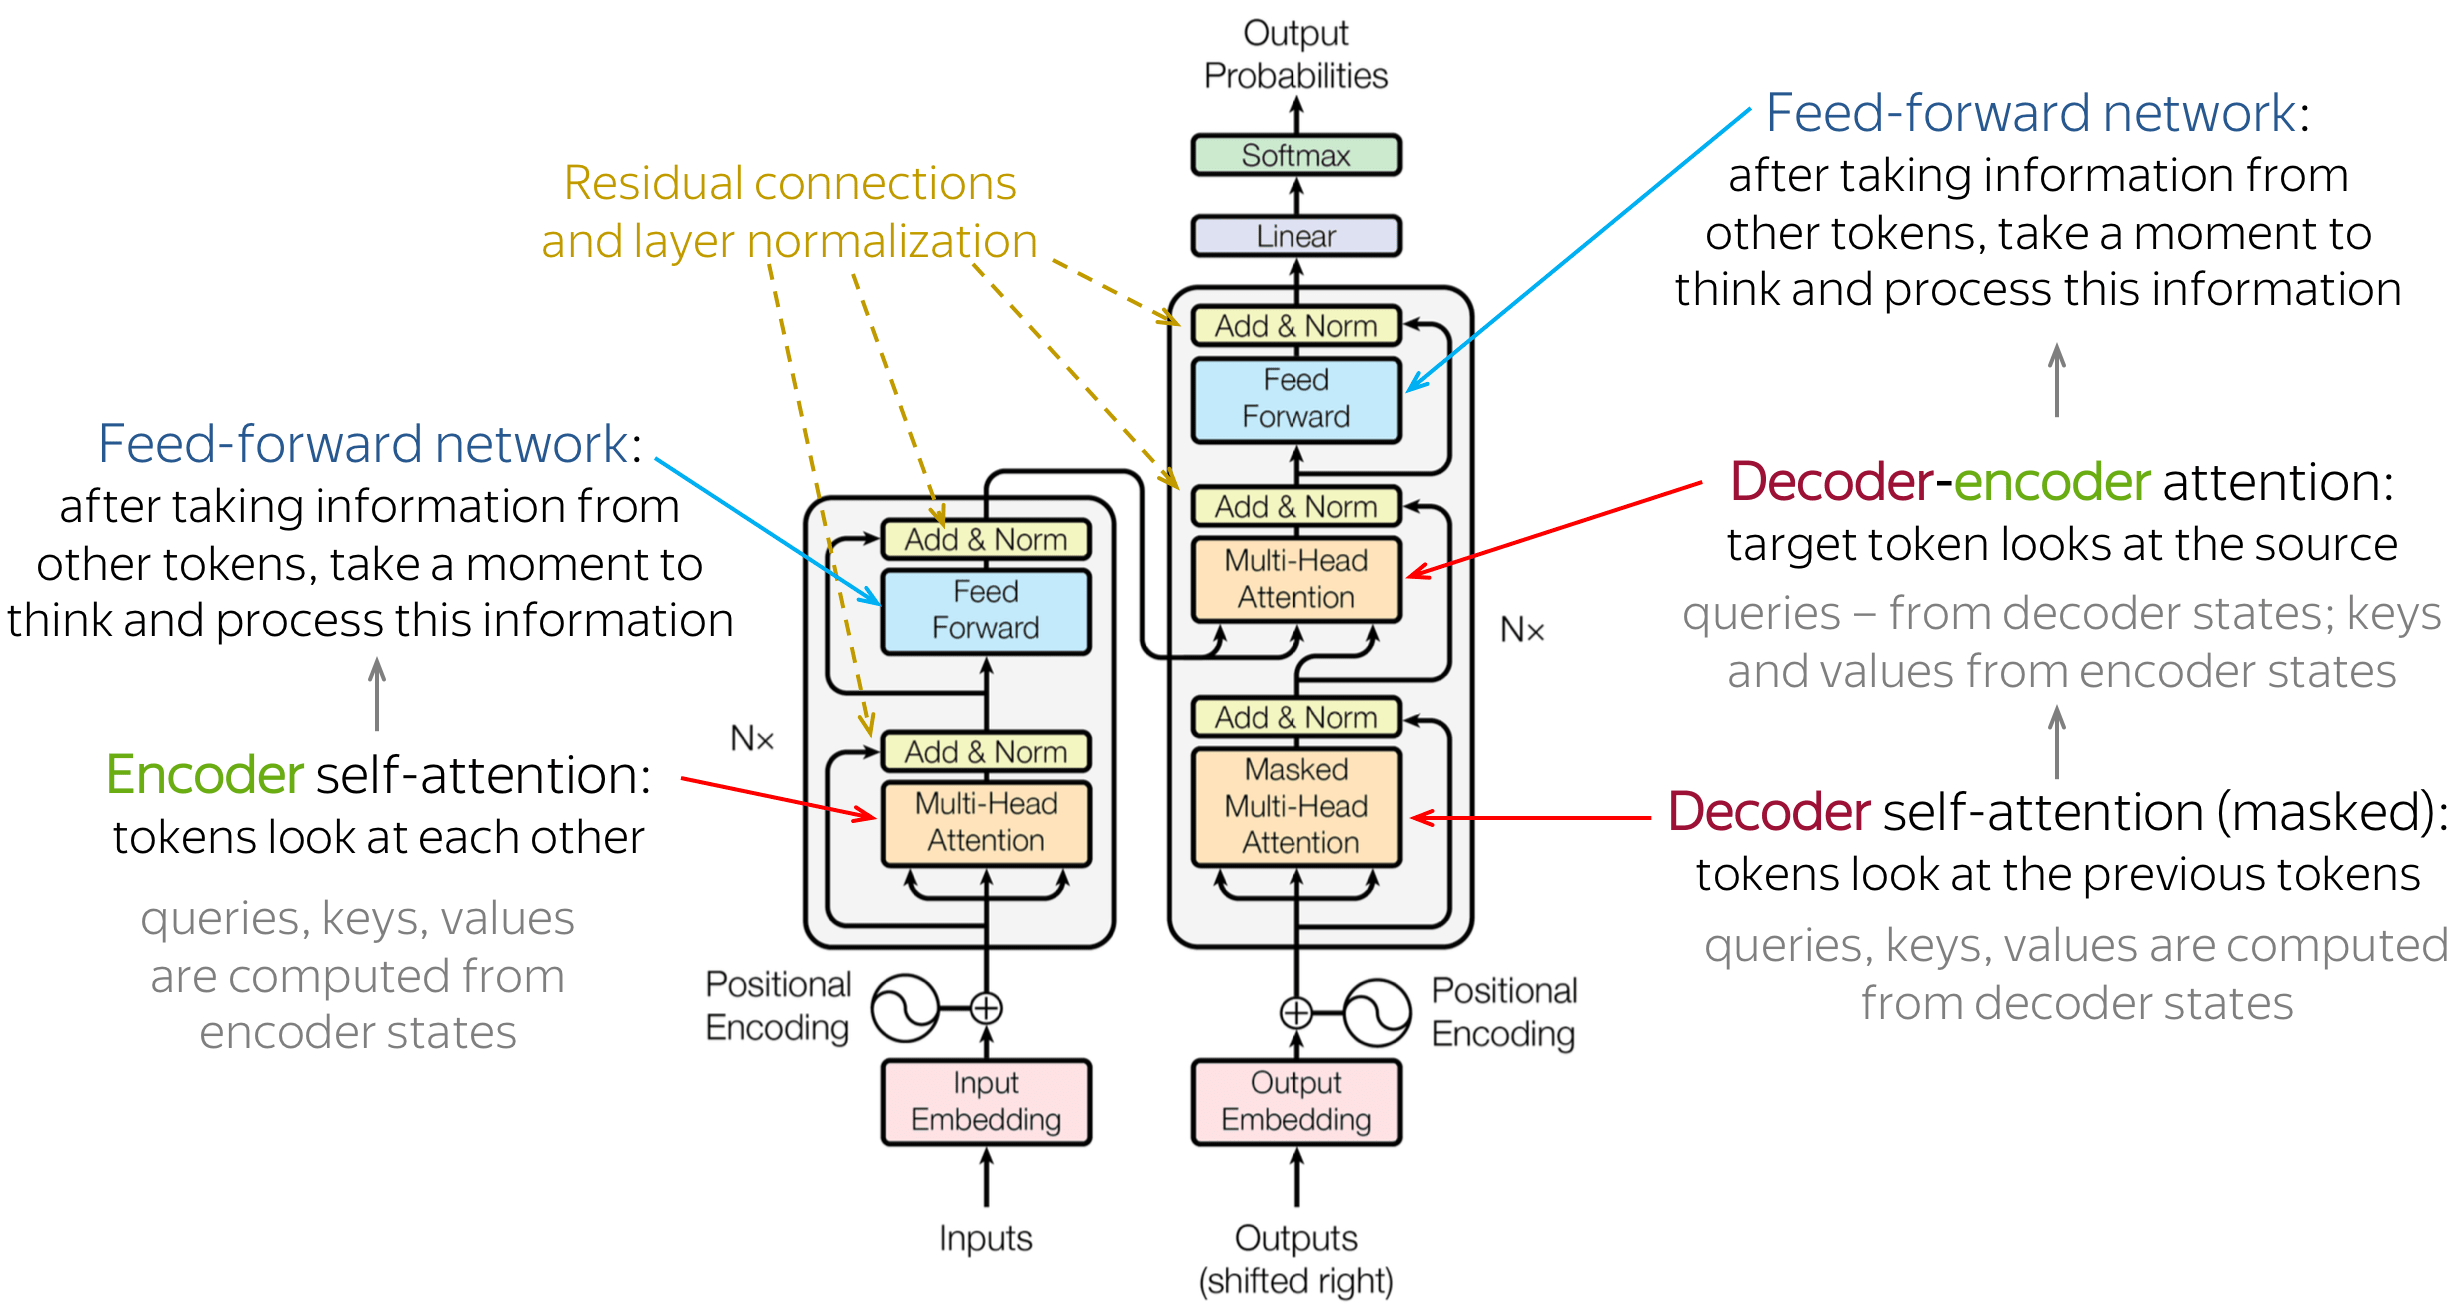

##### **Transformer**

**From this cell, you can start the journey of implementating transformer**

In [10]:
class TransformerSeq2Seq(nn.Module):
    def __init__(self, vocab_size, prog_vocab_size, max_q_len, max_p_len, word_vec_dim, hidden_dim, num_layers, device):
        super().__init__()
        self.device = device
        self.max_q_len = max_q_len
        self.max_p_len = max_p_len

        self.embedding_q = nn.Embedding(vocab_size, word_vec_dim, padding_idx=0)
        self.embedding_p = nn.Embedding(prog_vocab_size, word_vec_dim, padding_idx=0)

        self.pos_encoding_q = nn.Parameter(torch.randn(1, max_q_len, word_vec_dim))  # shape (1, T, D)
        self.pos_encoding_p = nn.Parameter(torch.randn(1, max_p_len, word_vec_dim))

        self.dropout = nn.Dropout(p=0.1)

        self.transformer = nn.Transformer(
            d_model=word_vec_dim,
            nhead=8,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=hidden_dim,
            dropout=0.1,
            batch_first=True
        )

        self.out_linear = nn.Linear(word_vec_dim, prog_vocab_size)

    def set_input(self, question, program):
        self.question = question  # (B, Tq)
        self.program = program    # (B, Tp)

    def forward(self):
        B, Tq = self.question.size()
        B, Tp = self.program.size()

        q_embed = self.embedding_q(self.question) + self.pos_encoding_q[:, :Tq, :]
        p_embed = self.embedding_p(self.program) + self.pos_encoding_p[:, :Tp, :]

        q_embed = self.dropout(q_embed)
        p_embed = self.dropout(p_embed)

        tgt_mask = nn.Transformer.generate_square_subsequent_mask(Tp).to(self.device)

        output = self.transformer(
            src=q_embed,
            tgt=p_embed,
            tgt_mask=tgt_mask,
            src_key_padding_mask=(self.question == 0),
            tgt_key_padding_mask=(self.program == 0)
        )

        logits = self.out_linear(output)  # (B, Tp, Vocab)
        return logits

    def sample_program(self, max_len=27, greedy=False):
        B = self.question.size(0)
        device = self.device
    
        q_embed = self.embedding_q(self.question) + self.pos_encoding_q[:, :self.question.size(1)]
        memory = self.transformer.encoder(q_embed)
    
        input_token = torch.ones(B, 1, dtype=torch.long, device=device)  # <START> token
        output_tokens = []
        log_probs = []
    
        for t in range(max_len):
            tgt_embed = self.embedding_p(input_token) + self.pos_encoding_p[:, :input_token.size(1)]
    
            # ✅ Fix: generate correct causal mask
            seq_len = input_token.size(1)
            tgt_mask = nn.Transformer.generate_square_subsequent_mask(seq_len).to(device)
    
            decoder_output = self.transformer.decoder(tgt=tgt_embed, memory=memory, tgt_mask=tgt_mask)
            logits = self.out_linear(decoder_output[:, -1, :])  # last step output
    
            probs = torch.softmax(logits, dim=-1)
            log_p = torch.log_softmax(logits, dim=-1)
    
            if greedy:
                sampled = torch.argmax(probs, dim=-1)
            else:
                sampled = torch.multinomial(probs, num_samples=1).squeeze(1)
    
            output_tokens.append(sampled)
            log_probs.append(log_p.gather(1, sampled.unsqueeze(1)).squeeze(1))
    
            input_token = torch.cat([input_token, sampled.unsqueeze(1)], dim=1)
    
        output_tokens = torch.stack(output_tokens, dim=1)
        log_probs = torch.stack(log_probs, dim=1)
    
        return output_tokens, log_probs


In [11]:
import json
import torch
import torch.nn as nn
from tqdm import tqdm
import os

class TransformerTrainerSupervised:
    def __init__(self, opt, train_loader, val_loader, model, executor):
        self.opt = opt
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model
        self.executor = executor

        self.device = model.device
        self.num_iters = opt.get('num_iters', 20000)
        self.run_dir = opt.get('run_dir', './logs')
        self.criterion = nn.CrossEntropyLoss(ignore_index=0)
        self.test_accuracies = []

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=opt.get('lr', 7e-4))
        os.makedirs(self.run_dir, exist_ok=True)

    def train(self):
        print(f"| start Transformer training, logging to {self.run_dir}")
        t = 0
        epoch = 0
        while t < self.num_iters:
            epoch += 1
            self.model.train()
            for x, y, _, _ in self.train_loader:
                t += 1

                x = x.to(self.device)
                y = y.to(self.device)
                self.model.set_input(x, y)

                self.optimizer.zero_grad()
                logits = self.model()  # (B, T, V)

                target = y[:, 1:].contiguous()
                output = logits[:, :-1, :].contiguous()

                loss = self.criterion(output.view(-1, output.size(-1)), target.view(-1))
                loss.backward()
                self.optimizer.step()

                if t % 100 == 0:
                    print(f"[Iteration {t}/{self.num_iters}] Loss: {loss.item():.4f}")

                if t >= self.num_iters:
                    break

            if epoch % 20 == 0:
                acc = self.evaluate_on_test()
                self.test_accuracies.append(acc)
                print(f"Epoch {epoch}: Test Accuracy = {acc:.2f}%")

        acc_path = os.path.join(self.run_dir, 'transformer_test_accuracies.json')
        with open(acc_path, 'w') as f:
            json.dump(self.test_accuracies, f)
        print(f"✅ Test accuracies saved to {acc_path}")

    def evaluate_on_test(self, max_samples=None):
        self.model.eval()
        correct = 0
        total = 0
        idx_to_answer = {int(v): k for k, v in self.executor.vocab['answer_token_to_idx'].items()}

        with torch.no_grad():
            for i, (x, y, gt_answers, img_idxs) in enumerate(tqdm(self.val_loader)):
                if max_samples and total >= max_samples:
                    break

                x = x.to(self.device)
                y = y.to(self.device)
                self.model.set_input(x, y)
                logits = self.model()
                pred_programs = torch.argmax(logits, dim=2).cpu()

                for b in range(pred_programs.size(0)):
                    prog = pred_programs[b].tolist()
                    if 2 in prog:
                        prog = prog[:prog.index(2) + 1]

                    img_idx = int(img_idxs[b])
                    true_ans_idx = int(gt_answers[b])
                    true_ans = idx_to_answer[true_ans_idx]

                    try:
                        answer = self.executor.run(prog, index=img_idx, split='val')
                    except:
                        answer = None

                    if answer == true_ans:
                        correct += 1
                    total += 1

        return 100.0 * correct / total if total > 0 else 0.0

In [59]:
# === Hyperparameters ===
vocab_size = len(vocab_json['question_token_to_idx'])
program_vocab_size = len(vocab_json['program_token_to_idx'])
word_vec_dim = 128
hidden_dim = 256
num_layers = 2  # Transformer typically uses 2+ layers
max_q_len = 46
max_prog_len = 27

# === Device ===
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# === Instantiate Transformer Model ===
model = TransformerSeq2Seq(
    vocab_size=vocab_size,
    prog_vocab_size=program_vocab_size,
    max_q_len=max_q_len,
    max_p_len=max_prog_len,
    word_vec_dim=word_vec_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    device=device
).to(device)

# === Options for Trainer ===
opt = {
    'num_iters': 20000,           # feel free to increase later
    'lr': 7e-4,
    'run_dir': './logs_transformer',
}

# === Trainer: Same as LSTM one ===
trainer = TransformerTrainerSupervised(opt, train_loader, test_loader, model, executor)

# === Start Training ===
trainer.train()

# === Save the model checkpoint ===
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': trainer.optimizer.state_dict(),
}, f"{opt['run_dir']}/supervised_transformer_model.pt")

print("✅ Transformer model saved.")

| start Transformer training, logging to ./logs_transformer
[Iteration 100/20000] Loss: 1.0804


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 170.83it/s]


Epoch 20: Test Accuracy = 4.89%
[Iteration 200/20000] Loss: 0.4555


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.65it/s]


Epoch 40: Test Accuracy = 8.09%
[Iteration 300/20000] Loss: 0.1599


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.55it/s]


Epoch 60: Test Accuracy = 10.53%
[Iteration 400/20000] Loss: 0.0912


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.39it/s]


Epoch 80: Test Accuracy = 12.57%
[Iteration 500/20000] Loss: 0.0715


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.11it/s]


Epoch 100: Test Accuracy = 12.66%
[Iteration 600/20000] Loss: 0.0559


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.14it/s]


Epoch 120: Test Accuracy = 14.16%
[Iteration 700/20000] Loss: 0.0363


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.81it/s]


Epoch 140: Test Accuracy = 14.44%
[Iteration 800/20000] Loss: 0.0196


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 170.91it/s]


Epoch 160: Test Accuracy = 13.80%
[Iteration 900/20000] Loss: 0.0202


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.40it/s]


Epoch 180: Test Accuracy = 15.34%
[Iteration 1000/20000] Loss: 0.0156


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.99it/s]


Epoch 200: Test Accuracy = 15.21%
[Iteration 1100/20000] Loss: 0.0196


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.81it/s]


Epoch 220: Test Accuracy = 15.75%
[Iteration 1200/20000] Loss: 0.0105


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.12it/s]


Epoch 240: Test Accuracy = 16.90%
[Iteration 1300/20000] Loss: 0.0161


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.51it/s]


Epoch 260: Test Accuracy = 17.02%
[Iteration 1400/20000] Loss: 0.0082


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.55it/s]


Epoch 280: Test Accuracy = 15.75%
[Iteration 1500/20000] Loss: 0.0183


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.41it/s]


Epoch 300: Test Accuracy = 13.74%
[Iteration 1600/20000] Loss: 0.0070


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.69it/s]


Epoch 320: Test Accuracy = 16.54%
[Iteration 1700/20000] Loss: 0.0140


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.07it/s]


Epoch 340: Test Accuracy = 15.97%
[Iteration 1800/20000] Loss: 0.0167


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.40it/s]


Epoch 360: Test Accuracy = 18.43%
[Iteration 1900/20000] Loss: 0.0101


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.08it/s]


Epoch 380: Test Accuracy = 17.52%
[Iteration 2000/20000] Loss: 0.0107


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.77it/s]


Epoch 400: Test Accuracy = 17.97%
[Iteration 2100/20000] Loss: 0.0099


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 170.51it/s]


Epoch 420: Test Accuracy = 16.90%
[Iteration 2200/20000] Loss: 0.0137


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.20it/s]


Epoch 440: Test Accuracy = 14.86%
[Iteration 2300/20000] Loss: 0.0090


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.63it/s]


Epoch 460: Test Accuracy = 16.33%
[Iteration 2400/20000] Loss: 0.0098


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.56it/s]


Epoch 480: Test Accuracy = 13.85%
[Iteration 2500/20000] Loss: 0.0254


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.63it/s]


Epoch 500: Test Accuracy = 18.56%
[Iteration 2600/20000] Loss: 0.0124


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.07it/s]


Epoch 520: Test Accuracy = 16.09%
[Iteration 2700/20000] Loss: 0.0079


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.65it/s]


Epoch 540: Test Accuracy = 18.47%
[Iteration 2800/20000] Loss: 0.0119


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.57it/s]


Epoch 560: Test Accuracy = 20.40%
[Iteration 2900/20000] Loss: 0.0076


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.62it/s]


Epoch 580: Test Accuracy = 19.01%
[Iteration 3000/20000] Loss: 0.0019


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.79it/s]


Epoch 600: Test Accuracy = 19.27%
[Iteration 3100/20000] Loss: 0.0039


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.83it/s]


Epoch 620: Test Accuracy = 20.23%
[Iteration 3200/20000] Loss: 0.0017


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.21it/s]


Epoch 640: Test Accuracy = 19.32%
[Iteration 3300/20000] Loss: 0.0078


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.39it/s]


Epoch 660: Test Accuracy = 19.28%
[Iteration 3400/20000] Loss: 0.0086


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.67it/s]


Epoch 680: Test Accuracy = 21.24%
[Iteration 3500/20000] Loss: 0.0143


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.59it/s]


Epoch 700: Test Accuracy = 17.67%
[Iteration 3600/20000] Loss: 0.0061


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.19it/s]


Epoch 720: Test Accuracy = 20.94%
[Iteration 3700/20000] Loss: 0.0049


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.14it/s]


Epoch 740: Test Accuracy = 18.34%
[Iteration 3800/20000] Loss: 0.0013


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 170.56it/s]


Epoch 760: Test Accuracy = 18.06%
[Iteration 3900/20000] Loss: 0.0029


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.37it/s]


Epoch 780: Test Accuracy = 19.32%
[Iteration 4000/20000] Loss: 0.0017


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.24it/s]


Epoch 800: Test Accuracy = 18.58%
[Iteration 4100/20000] Loss: 0.0014


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.88it/s]


Epoch 820: Test Accuracy = 22.12%
[Iteration 4200/20000] Loss: 0.0068


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 171.40it/s]


Epoch 840: Test Accuracy = 16.43%
[Iteration 4300/20000] Loss: 0.0043


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.48it/s]


Epoch 860: Test Accuracy = 20.79%
[Iteration 4400/20000] Loss: 0.0067


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.98it/s]


Epoch 880: Test Accuracy = 20.88%
[Iteration 4500/20000] Loss: 0.0020


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 170.58it/s]


Epoch 900: Test Accuracy = 18.07%
[Iteration 4600/20000] Loss: 0.0017


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.78it/s]


Epoch 920: Test Accuracy = 21.97%
[Iteration 4700/20000] Loss: 0.0052


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.90it/s]


Epoch 940: Test Accuracy = 21.22%
[Iteration 4800/20000] Loss: 0.0094


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.63it/s]


Epoch 960: Test Accuracy = 20.71%
[Iteration 4900/20000] Loss: 0.0095


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.62it/s]


Epoch 980: Test Accuracy = 20.42%
[Iteration 5000/20000] Loss: 0.0030


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.84it/s]


Epoch 1000: Test Accuracy = 22.02%
[Iteration 5100/20000] Loss: 0.0040


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.94it/s]


Epoch 1020: Test Accuracy = 18.62%
[Iteration 5200/20000] Loss: 0.0125


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.26it/s]


Epoch 1040: Test Accuracy = 21.05%
[Iteration 5300/20000] Loss: 0.0019


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.16it/s]


Epoch 1060: Test Accuracy = 20.77%
[Iteration 5400/20000] Loss: 0.0069


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.92it/s]


Epoch 1080: Test Accuracy = 21.73%
[Iteration 5500/20000] Loss: 0.0186


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.95it/s]


Epoch 1100: Test Accuracy = 23.54%
[Iteration 5600/20000] Loss: 0.0031


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.60it/s]


Epoch 1120: Test Accuracy = 21.55%
[Iteration 5700/20000] Loss: 0.0043


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.82it/s]


Epoch 1140: Test Accuracy = 22.65%
[Iteration 5800/20000] Loss: 0.0035


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.85it/s]


Epoch 1160: Test Accuracy = 22.11%
[Iteration 5900/20000] Loss: 0.0013


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.23it/s]


Epoch 1180: Test Accuracy = 22.89%
[Iteration 6000/20000] Loss: 0.0026


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.66it/s]


Epoch 1200: Test Accuracy = 21.52%
[Iteration 6100/20000] Loss: 0.0073


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.14it/s]


Epoch 1220: Test Accuracy = 20.70%
[Iteration 6200/20000] Loss: 0.0034


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.49it/s]


Epoch 1240: Test Accuracy = 21.13%
[Iteration 6300/20000] Loss: 0.0017


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.28it/s]


Epoch 1260: Test Accuracy = 23.34%
[Iteration 6400/20000] Loss: 0.0034


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.07it/s]


Epoch 1280: Test Accuracy = 23.64%
[Iteration 6500/20000] Loss: 0.0037


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.98it/s]


Epoch 1300: Test Accuracy = 21.71%
[Iteration 6600/20000] Loss: 0.0021


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.86it/s]


Epoch 1320: Test Accuracy = 22.02%
[Iteration 6700/20000] Loss: 0.0033


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.91it/s]


Epoch 1340: Test Accuracy = 21.24%
[Iteration 6800/20000] Loss: 0.0018


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.31it/s]


Epoch 1360: Test Accuracy = 20.49%
[Iteration 6900/20000] Loss: 0.0046


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.42it/s]


Epoch 1380: Test Accuracy = 20.02%
[Iteration 7000/20000] Loss: 0.0019


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.46it/s]


Epoch 1400: Test Accuracy = 24.09%
[Iteration 7100/20000] Loss: 0.0025


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.18it/s]


Epoch 1420: Test Accuracy = 21.94%
[Iteration 7200/20000] Loss: 0.0091


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.04it/s]


Epoch 1440: Test Accuracy = 22.14%
[Iteration 7300/20000] Loss: 0.0059


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.43it/s]


Epoch 1460: Test Accuracy = 24.26%
[Iteration 7400/20000] Loss: 0.0168


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.24it/s]


Epoch 1480: Test Accuracy = 21.02%
[Iteration 7500/20000] Loss: 0.0067


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.91it/s]


Epoch 1500: Test Accuracy = 24.14%
[Iteration 7600/20000] Loss: 0.0051


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.33it/s]


Epoch 1520: Test Accuracy = 25.20%
[Iteration 7700/20000] Loss: 0.0004


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.02it/s]


Epoch 1540: Test Accuracy = 25.75%
[Iteration 7800/20000] Loss: 0.0068


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.17it/s]


Epoch 1560: Test Accuracy = 25.74%
[Iteration 7900/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.78it/s]


Epoch 1580: Test Accuracy = 25.77%
[Iteration 8000/20000] Loss: 0.0065


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.36it/s]


Epoch 1600: Test Accuracy = 23.42%
[Iteration 8100/20000] Loss: 0.0039


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.34it/s]


Epoch 1620: Test Accuracy = 24.05%
[Iteration 8200/20000] Loss: 0.0004


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.67it/s]


Epoch 1640: Test Accuracy = 24.80%
[Iteration 8300/20000] Loss: 0.0063


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.16it/s]


Epoch 1660: Test Accuracy = 20.47%
[Iteration 8400/20000] Loss: 0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.07it/s]


Epoch 1680: Test Accuracy = 24.68%
[Iteration 8500/20000] Loss: 0.0138


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.73it/s]


Epoch 1700: Test Accuracy = 25.13%
[Iteration 8600/20000] Loss: 0.0015


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.57it/s]


Epoch 1720: Test Accuracy = 25.74%
[Iteration 8700/20000] Loss: 0.0013


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.95it/s]


Epoch 1740: Test Accuracy = 23.85%
[Iteration 8800/20000] Loss: 0.0053


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.59it/s]


Epoch 1760: Test Accuracy = 27.61%
[Iteration 8900/20000] Loss: 0.0061


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.39it/s]


Epoch 1780: Test Accuracy = 23.70%
[Iteration 9000/20000] Loss: 0.0027


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.99it/s]


Epoch 1800: Test Accuracy = 21.98%
[Iteration 9100/20000] Loss: 0.0030


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.94it/s]


Epoch 1820: Test Accuracy = 23.07%
[Iteration 9200/20000] Loss: 0.0067


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.61it/s]


Epoch 1840: Test Accuracy = 23.69%
[Iteration 9300/20000] Loss: 0.0288


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.77it/s]


Epoch 1860: Test Accuracy = 24.92%
[Iteration 9400/20000] Loss: 0.0082


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.70it/s]


Epoch 1880: Test Accuracy = 24.85%
[Iteration 9500/20000] Loss: 0.0054


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 170.73it/s]


Epoch 1900: Test Accuracy = 22.42%
[Iteration 9600/20000] Loss: 0.0009


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.01it/s]


Epoch 1920: Test Accuracy = 25.70%
[Iteration 9700/20000] Loss: 0.0009


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 170.72it/s]


Epoch 1940: Test Accuracy = 25.02%
[Iteration 9800/20000] Loss: 0.0088


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 170.66it/s]


Epoch 1960: Test Accuracy = 24.55%
[Iteration 9900/20000] Loss: 0.0177


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.40it/s]


Epoch 1980: Test Accuracy = 23.95%
[Iteration 10000/20000] Loss: 0.0002


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.07it/s]


Epoch 2000: Test Accuracy = 24.79%
[Iteration 10100/20000] Loss: 0.0036


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:10<00:00, 170.70it/s]


Epoch 2020: Test Accuracy = 23.69%
[Iteration 10200/20000] Loss: 0.0010


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.93it/s]


Epoch 2040: Test Accuracy = 22.90%
[Iteration 10300/20000] Loss: 0.0123


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.98it/s]


Epoch 2060: Test Accuracy = 25.02%
[Iteration 10400/20000] Loss: 0.0034


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.85it/s]


Epoch 2080: Test Accuracy = 23.86%
[Iteration 10500/20000] Loss: 0.0167


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.27it/s]


Epoch 2100: Test Accuracy = 24.95%
[Iteration 10600/20000] Loss: 0.0084


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.06it/s]


Epoch 2120: Test Accuracy = 24.93%
[Iteration 10700/20000] Loss: 0.0013


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.34it/s]


Epoch 2140: Test Accuracy = 23.62%
[Iteration 10800/20000] Loss: 0.0020


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.18it/s]


Epoch 2160: Test Accuracy = 26.33%
[Iteration 10900/20000] Loss: 0.0010


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.18it/s]


Epoch 2180: Test Accuracy = 23.69%
[Iteration 11000/20000] Loss: 0.0056


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.89it/s]


Epoch 2200: Test Accuracy = 25.28%
[Iteration 11100/20000] Loss: 0.0034


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.73it/s]


Epoch 2220: Test Accuracy = 25.76%
[Iteration 11200/20000] Loss: 0.0042


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.00it/s]


Epoch 2240: Test Accuracy = 23.92%
[Iteration 11300/20000] Loss: 0.0080


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.97it/s]


Epoch 2260: Test Accuracy = 27.10%
[Iteration 11400/20000] Loss: 0.0007


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.68it/s]


Epoch 2280: Test Accuracy = 27.40%
[Iteration 11500/20000] Loss: 0.0076


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 170.03it/s]


Epoch 2300: Test Accuracy = 25.77%
[Iteration 11600/20000] Loss: 0.0012


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.96it/s]


Epoch 2320: Test Accuracy = 26.72%
[Iteration 11700/20000] Loss: 0.0021


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.25it/s]


Epoch 2340: Test Accuracy = 26.59%
[Iteration 11800/20000] Loss: 0.0020


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.73it/s]


Epoch 2360: Test Accuracy = 25.25%
[Iteration 11900/20000] Loss: 0.0011


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.87it/s]


Epoch 2380: Test Accuracy = 28.49%
[Iteration 12000/20000] Loss: 0.0069


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.64it/s]


Epoch 2400: Test Accuracy = 28.58%
[Iteration 12100/20000] Loss: 0.0129


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.49it/s]


Epoch 2420: Test Accuracy = 27.86%
[Iteration 12200/20000] Loss: 0.0055


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.32it/s]


Epoch 2440: Test Accuracy = 26.80%
[Iteration 12300/20000] Loss: 0.0025


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.75it/s]


Epoch 2460: Test Accuracy = 26.49%
[Iteration 12400/20000] Loss: 0.0015


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.66it/s]


Epoch 2480: Test Accuracy = 25.70%
[Iteration 12500/20000] Loss: 0.0002


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.84it/s]


Epoch 2500: Test Accuracy = 27.77%
[Iteration 12600/20000] Loss: 0.0163


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.73it/s]


Epoch 2520: Test Accuracy = 27.68%
[Iteration 12700/20000] Loss: 0.0006


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.82it/s]


Epoch 2540: Test Accuracy = 26.88%
[Iteration 12800/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.43it/s]


Epoch 2560: Test Accuracy = 25.95%
[Iteration 12900/20000] Loss: 0.0127


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.13it/s]


Epoch 2580: Test Accuracy = 24.72%
[Iteration 13000/20000] Loss: 0.0271


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.54it/s]


Epoch 2600: Test Accuracy = 24.32%
[Iteration 13100/20000] Loss: 0.0034


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.24it/s]


Epoch 2620: Test Accuracy = 27.44%
[Iteration 13200/20000] Loss: 0.0077


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 165.71it/s]


Epoch 2640: Test Accuracy = 29.19%
[Iteration 13300/20000] Loss: 0.0006


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.61it/s]


Epoch 2660: Test Accuracy = 28.56%
[Iteration 13400/20000] Loss: 0.0002


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.76it/s]


Epoch 2680: Test Accuracy = 28.56%
[Iteration 13500/20000] Loss: 0.0006


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.57it/s]


Epoch 2700: Test Accuracy = 29.13%
[Iteration 13600/20000] Loss: 0.0008


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.02it/s]


Epoch 2720: Test Accuracy = 29.31%
[Iteration 13700/20000] Loss: 0.0022


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.79it/s]


Epoch 2740: Test Accuracy = 28.42%
[Iteration 13800/20000] Loss: 0.0009


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.88it/s]


Epoch 2760: Test Accuracy = 28.28%
[Iteration 13900/20000] Loss: 0.0012


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.65it/s]


Epoch 2780: Test Accuracy = 29.94%
[Iteration 14000/20000] Loss: 0.0068


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.10it/s]


Epoch 2800: Test Accuracy = 27.13%
[Iteration 14100/20000] Loss: 0.0012


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.92it/s]


Epoch 2820: Test Accuracy = 28.02%
[Iteration 14200/20000] Loss: 0.0031


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.61it/s]


Epoch 2840: Test Accuracy = 26.86%
[Iteration 14300/20000] Loss: 0.0035


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.39it/s]


Epoch 2860: Test Accuracy = 27.53%
[Iteration 14400/20000] Loss: 0.0036


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.41it/s]


Epoch 2880: Test Accuracy = 27.01%
[Iteration 14500/20000] Loss: 0.0029


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.21it/s]


Epoch 2900: Test Accuracy = 26.73%
[Iteration 14600/20000] Loss: 0.0034


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.60it/s]


Epoch 2920: Test Accuracy = 29.71%
[Iteration 14700/20000] Loss: 0.0010


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.44it/s]


Epoch 2940: Test Accuracy = 27.36%
[Iteration 14800/20000] Loss: 0.0342


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.06it/s]


Epoch 2960: Test Accuracy = 28.71%
[Iteration 14900/20000] Loss: 0.0075


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.82it/s]


Epoch 2980: Test Accuracy = 29.08%
[Iteration 15000/20000] Loss: 0.0011


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.16it/s]


Epoch 3000: Test Accuracy = 27.12%
[Iteration 15100/20000] Loss: 0.0024


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.98it/s]


Epoch 3020: Test Accuracy = 27.31%
[Iteration 15200/20000] Loss: 0.0009


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 165.80it/s]


Epoch 3040: Test Accuracy = 30.48%
[Iteration 15300/20000] Loss: 0.0004


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.02it/s]


Epoch 3060: Test Accuracy = 28.98%
[Iteration 15400/20000] Loss: 0.0092


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.31it/s]


Epoch 3080: Test Accuracy = 27.20%
[Iteration 15500/20000] Loss: 0.0102


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.80it/s]


Epoch 3100: Test Accuracy = 29.35%
[Iteration 15600/20000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 165.55it/s]


Epoch 3120: Test Accuracy = 30.92%
[Iteration 15700/20000] Loss: 0.0255


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 165.62it/s]


Epoch 3140: Test Accuracy = 30.24%
[Iteration 15800/20000] Loss: 0.0019


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.30it/s]


Epoch 3160: Test Accuracy = 29.52%
[Iteration 15900/20000] Loss: 0.0002


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.81it/s]


Epoch 3180: Test Accuracy = 28.47%
[Iteration 16000/20000] Loss: 0.0030


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.24it/s]


Epoch 3200: Test Accuracy = 29.48%
[Iteration 16100/20000] Loss: 0.0021


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.45it/s]


Epoch 3220: Test Accuracy = 28.25%
[Iteration 16200/20000] Loss: 0.0002


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 165.97it/s]


Epoch 3240: Test Accuracy = 27.56%
[Iteration 16300/20000] Loss: 0.0004


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.82it/s]


Epoch 3260: Test Accuracy = 29.53%
[Iteration 16400/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.06it/s]


Epoch 3280: Test Accuracy = 29.93%
[Iteration 16500/20000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.14it/s]


Epoch 3300: Test Accuracy = 28.02%
[Iteration 16600/20000] Loss: 0.0056


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.62it/s]


Epoch 3320: Test Accuracy = 29.05%
[Iteration 16700/20000] Loss: 0.0035


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.22it/s]


Epoch 3340: Test Accuracy = 30.41%
[Iteration 16800/20000] Loss: 0.0327


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.96it/s]


Epoch 3360: Test Accuracy = 29.22%
[Iteration 16900/20000] Loss: 0.0049


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.12it/s]


Epoch 3380: Test Accuracy = 28.45%
[Iteration 17000/20000] Loss: 0.0009


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 165.96it/s]


Epoch 3400: Test Accuracy = 29.55%
[Iteration 17100/20000] Loss: 0.0015


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.70it/s]


Epoch 3420: Test Accuracy = 26.91%
[Iteration 17200/20000] Loss: 0.0008


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.30it/s]


Epoch 3440: Test Accuracy = 27.03%
[Iteration 17300/20000] Loss: 0.0034


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.69it/s]


Epoch 3460: Test Accuracy = 29.55%
[Iteration 17400/20000] Loss: 0.0324


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.35it/s]


Epoch 3480: Test Accuracy = 30.03%
[Iteration 17500/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.58it/s]


Epoch 3500: Test Accuracy = 29.92%
[Iteration 17600/20000] Loss: 0.0043


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.70it/s]


Epoch 3520: Test Accuracy = 29.21%
[Iteration 17700/20000] Loss: 0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 166.18it/s]


Epoch 3540: Test Accuracy = 30.20%
[Iteration 17800/20000] Loss: 0.0022


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 165.89it/s]


Epoch 3560: Test Accuracy = 31.98%
[Iteration 17900/20000] Loss: 0.0014


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.86it/s]


Epoch 3580: Test Accuracy = 31.45%
[Iteration 18000/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.62it/s]


Epoch 3600: Test Accuracy = 28.91%
[Iteration 18100/20000] Loss: 0.0021


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.12it/s]


Epoch 3620: Test Accuracy = 29.44%
[Iteration 18200/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.60it/s]


Epoch 3640: Test Accuracy = 32.20%
[Iteration 18300/20000] Loss: 0.0017


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.81it/s]


Epoch 3660: Test Accuracy = 28.09%
[Iteration 18400/20000] Loss: 0.0004


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.70it/s]


Epoch 3680: Test Accuracy = 29.45%
[Iteration 18500/20000] Loss: 0.0002


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.08it/s]


Epoch 3700: Test Accuracy = 31.12%
[Iteration 18600/20000] Loss: 0.0006


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.58it/s]


Epoch 3720: Test Accuracy = 29.45%
[Iteration 18700/20000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.47it/s]


Epoch 3740: Test Accuracy = 32.06%
[Iteration 18800/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.32it/s]


Epoch 3760: Test Accuracy = 31.25%
[Iteration 18900/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.20it/s]


Epoch 3780: Test Accuracy = 31.86%
[Iteration 19000/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.26it/s]


Epoch 3800: Test Accuracy = 30.80%
[Iteration 19100/20000] Loss: 0.0094


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 167.60it/s]


Epoch 3820: Test Accuracy = 30.22%
[Iteration 19200/20000] Loss: 0.0001


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.01it/s]


Epoch 3840: Test Accuracy = 33.83%
[Iteration 19300/20000] Loss: 0.0016


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.24it/s]


Epoch 3860: Test Accuracy = 31.54%
[Iteration 19400/20000] Loss: 0.0003


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.29it/s]


Epoch 3880: Test Accuracy = 30.98%
[Iteration 19500/20000] Loss: 0.0065


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.07it/s]


Epoch 3900: Test Accuracy = 31.14%
[Iteration 19600/20000] Loss: 0.0034


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.23it/s]


Epoch 3920: Test Accuracy = 29.05%
[Iteration 19700/20000] Loss: 0.0010


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.98it/s]


Epoch 3940: Test Accuracy = 30.59%
[Iteration 19800/20000] Loss: 0.0006


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.44it/s]


Epoch 3960: Test Accuracy = 31.35%
[Iteration 19900/20000] Loss: 0.0004


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.43it/s]


Epoch 3980: Test Accuracy = 29.16%
[Iteration 20000/20000] Loss: 0.0007


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 169.27it/s]


Epoch 4000: Test Accuracy = 29.46%
✅ Test accuracies saved to ./logs_transformer/transformer_test_accuracies.json
✅ Transformer model saved.


In [12]:
#========================= Hyperparameters ============================
vocab_size = len(vocab_json['question_token_to_idx'])
program_vocab_size = len(vocab_json['program_token_to_idx'])
word_vec_dim = 128
hidden_dim = 256
n_layers = 2  # Usually 2+ layers in Transformers
max_q_len = 46
max_prog_len = 27
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#========================= Load Pretrained Transformer Model ============================
model = TransformerSeq2Seq(
    vocab_size=vocab_size,
    prog_vocab_size=program_vocab_size,
    max_q_len=max_q_len,
    max_p_len=max_prog_len,
    word_vec_dim=word_vec_dim,
    hidden_dim=hidden_dim,
    num_layers=n_layers,
    device=device
).to(device)

# Load the weights
checkpoint = torch.load('./logs_transformer/supervised_transformer_model.pt', map_location=device)

model.load_state_dict(checkpoint['model_state_dict'])
print("✅ Model weights loaded successfully.")
model.eval()
evaluate(model, test_loader, executor, vocab_json, device, max_samples=None)

✅ Model weights loaded successfully.


  0%|                                                                                          | 0/1875 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:380: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:5076: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:16<00:00, 113.70it/s]


 Accuracy on 119995 test samples: 29.46%


**In the following cell, you need to plot of the test-accuracy in terms of epoch for both LSTM and Transforemer** 

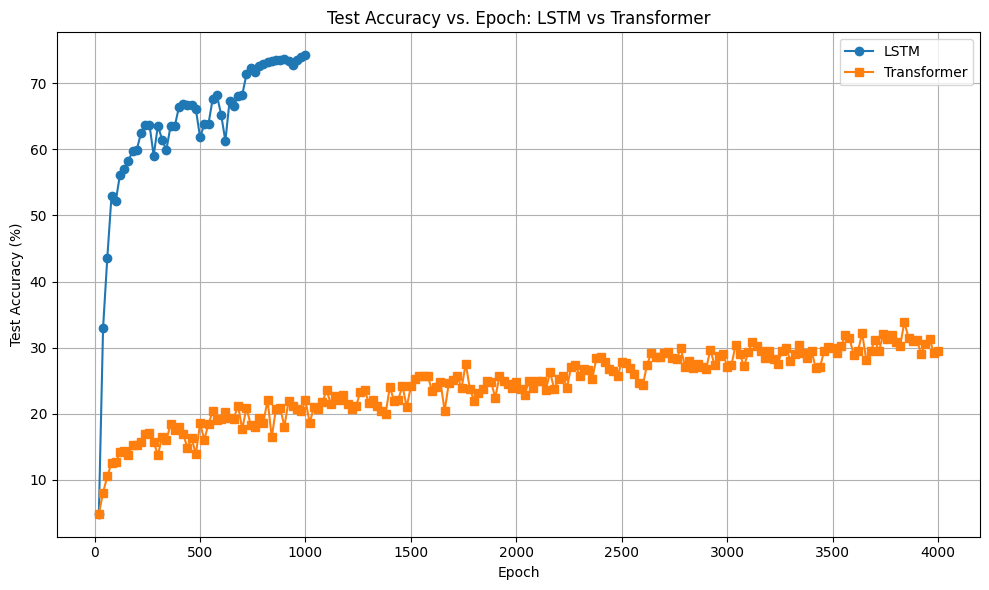

In [1]:
#===================== Plot the curve of test-accuracy =================================
import json
import matplotlib.pyplot as plt

# Load test accuracies from JSON files
with open('logs/test_accuracies.json', 'r') as f:
    lstm_accuracies = json.load(f)

with open('logs_transformer/transformer_test_accuracies.json', 'r') as f:
    transformer_accuracies = json.load(f)

# X-axis: epochs (every 20 epochs based on trainer logic)
lstm_epochs = list(range(20, 20 * (len(lstm_accuracies) + 1), 20))
transformer_epochs = list(range(20, 20 * (len(transformer_accuracies) + 1), 20))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lstm_epochs, lstm_accuracies, label='LSTM', marker='o')
plt.plot(transformer_epochs, transformer_accuracies, label='Transformer', marker='s')
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy vs. Epoch: LSTM vs Transformer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**In the following, you need to save the trained model. you are going to use the saved model in the REINFORCE algorithm** 

In [4]:
#===================== Save trained model =================================
# I have saved both LSTM-based and Transformer-based  models before.

---
#### **Reinforce Algorithm**

In this section, we want to use REINFORCE algorithm. Here, you can see the pipline of the algorithm. 

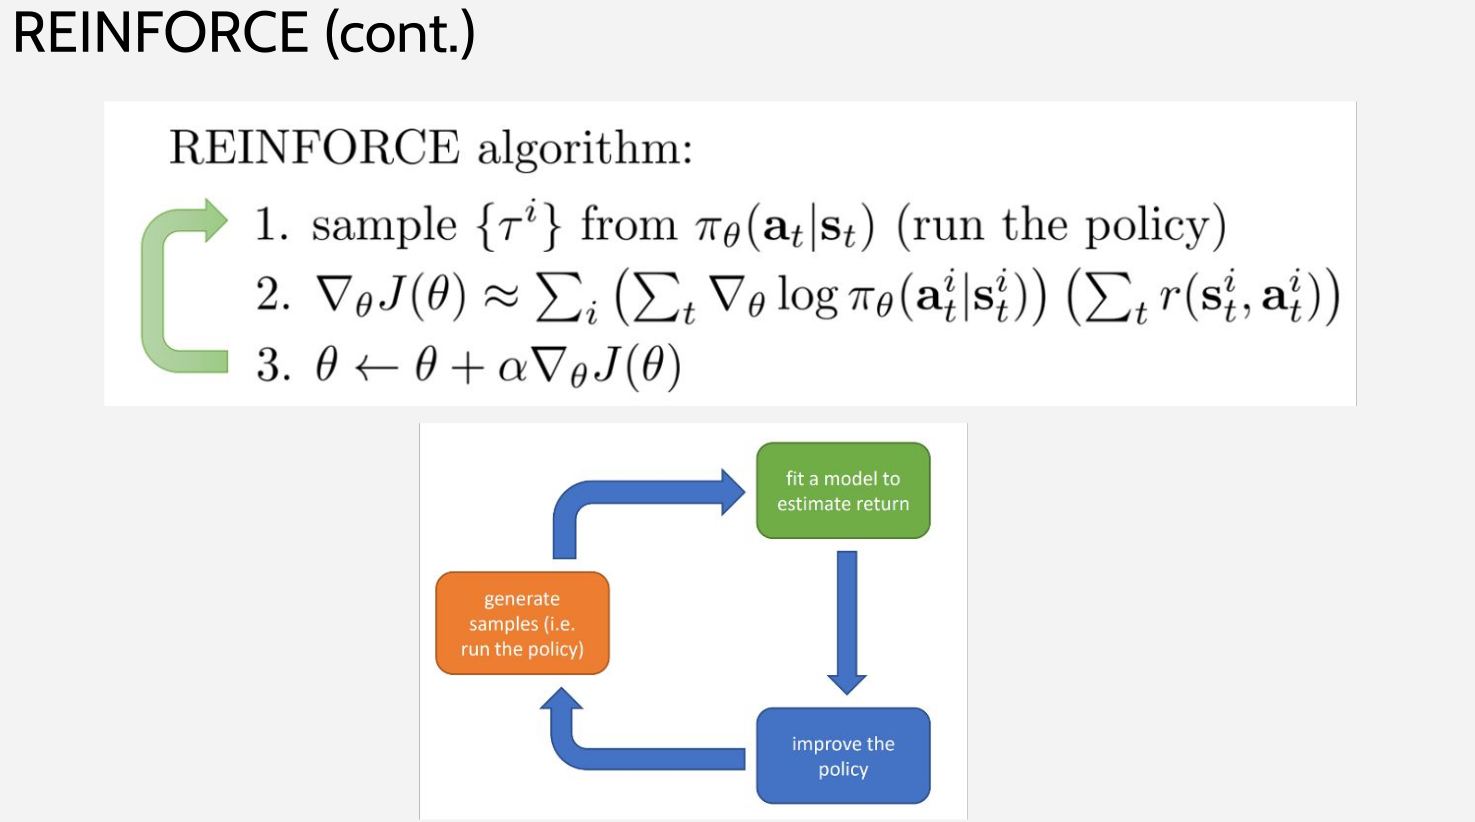



However, for more mathematical details, you can see the course slides of VQA, slides 14-17 and also, it is suggested to see this article [REINFORCE](https://www.semanticscholar.org/paper/Simple-Statistical-Gradient-Following-Algorithms-Williams/4c915c1eecb217c123a36dc6d3ce52d12c742614). In this part, you need to load the trained model in the supervised strategy and fine tune them using the REINFORCE algorithm. Here, a trainer class for REINFORCE has been implemented you need to complete some parts of it and then use it to fine the pretrained model obtained from supervised strategy.  

Please explain the terms reward, baseline and advantage defined in the trian function, see [REINFORCE](https://www.semanticscholar.org/paper/Simple-Statistical-Gradient-Following-Algorithms-Williams/4c915c1eecb217c123a36dc6d3ce52d12c742614).

In the following, you need calculate the reward given the ouput of the decoder in get_batch_reward and then calculate the loss function defined in [REINFORCE](https://www.semanticscholar.org/paper/Simple-Statistical-Gradient-Following-Algorithms-Williams/4c915c1eecb217c123a36dc6d3ce52d12c742614)
and complete the training loop. 

In [44]:
class TrainerReinforce():
    """Trainer"""

    def __init__(self, opt, train_loader, val_loader, model, executor):
        self.opt = opt
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model
        self.executor = executor

        self.device = model.device
        self.num_iters = opt.get('num_iters', 5000)
        self.run_dir = opt.get('run_dir', './logs_reinforce')
        self.reward_decay = opt.get('reward_decay', 0.9)
        self.lr = opt.get('lr', 7e-4)
        #===================== Configure the optimizer Set visualization Setup======================
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        os.makedirs(self.run_dir, exist_ok=True)



    #===================== Complete code(Begin) ================================ 
    def train(self):
        print(f"| Start training with REINFORCE, logging to {self.run_dir}")
        
        t = 0
        epoch = 0
        baseline = 0
        
        while t < self.num_iters:
            epoch += 1
            self.model.train()
            
            for x, y, answers, image_idxs in self.train_loader:
                t += 1
                x = x.to(self.device)
                y = y.to(self.device)
                self.model.set_input(x, y)

                # Encode
                encoder_outputs, encoder_hidden = self.model.encoder(x)

                if isinstance(encoder_hidden, tuple):  # LSTM
                    h_n, c_n = encoder_hidden
                    h_n = h_n.view(self.model.encoder.n_layers, 2, -1, self.model.encoder.hidden_size).sum(1)
                    c_n = c_n.view(self.model.encoder.n_layers, 2, -1, self.model.encoder.hidden_size).sum(1)
                    encoder_hidden = (h_n, c_n)
                else:  # GRU
                    h_n = encoder_hidden
                    h_n = h_n.view(self.model.encoder.n_layers, 2, -1, self.model.encoder.hidden_size).sum(1)
                    encoder_hidden = h_n

                sampled_programs, log_probs = self.model.decoder.forward_sample(
                    encoder_outputs, encoder_hidden, reinforce_sample=True)

                reward = self.get_batch_reward(sampled_programs, answers, image_idxs, split='train').to(self.device)

                baseline = reward.mean().item() * (1 - self.reward_decay) + baseline * self.reward_decay
                advantage = reward - baseline

                # REINFORCE loss
                loss = - (log_probs.sum(dim=1) * advantage).mean()
                
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                #================================== make visulization during training ======================
                if t % 100 == 0:
                    print(f"[Iteration {t}/{self.num_iters}] Loss: {loss.item():.4f}, Reward: {reward.mean().item():.4f}, Baseline: {baseline:.4f}")

                if t >= self.num_iters:
                    break
    
    def get_batch_reward(self, programs, answers, image_idxs, split='train'):
        #================ Complete the code====================
        rewards = []
        idx_to_answer = {int(v): k for k, v in self.executor.vocab['answer_token_to_idx'].items()}

        for i in range(programs.size(0)):
            prog = programs[i].tolist()
            if 2 in prog:
                prog = prog[:prog.index(2) + 1]  # cut at <END>

            img_idx = int(image_idxs[i])
            true_ans = idx_to_answer[int(answers[i])]

            try:
                pred_ans = self.executor.run(prog, index=img_idx, split=split)
            except:
                pred_ans = None

            reward = 1.0 if pred_ans == true_ans else 0.0
            rewards.append(reward)

        return torch.tensor(rewards, dtype=torch.float32)
    


##### LSTM Fine tuning

In the following model, you should apply REINFORCE to pretrained LSTM to fine tune it and save the fine tuned model.

In [52]:
#===================== Complete code(End) ================================ 
vocab_size = len(vocab_json['question_token_to_idx'])
program_vocab_size = len(vocab_json['program_token_to_idx'])
word_vec_dim = 128
hidden_size = 256
n_layers = 1
max_q_len = 46
max_prog_len = 27
use_attention = True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#=========================Write the necessary code here ============================
encoder = Encoder(
    vocab_size=vocab_size,
    max_len=max_q_len,
    word_vec_dim=word_vec_dim,
    hidden_size=hidden_size,
    n_layers=n_layers,
    bidirectional=True,
    input_dropout_p=0.1,
    dropout_p=0.1,
    rnn_cell='lstm'
)

decoder = Decoder(
    vocab_size=program_vocab_size,
    max_len=max_prog_len,
    word_vec_dim=word_vec_dim,
    hidden_size=hidden_size,
    n_layers=n_layers,
    use_attention=use_attention,
    input_dropout_p=0.1,
    dropout_p=0.1,
    bidirectional=True
)
#======================== Load pre-trained LSTM model ==================================
model = Seq2SeqModel(encoder, decoder, device).to(device)
ckpt_path = './logs/supervised_model.pt'
checkpoint = torch.load(ckpt_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
print("✅ Loaded pretrained LSTM model")

#======================== Create dataloaders and excutors =============================
opt = {
    'num_iters': 20000,
    'lr': 7e-5,
    'run_dir': './logs_reinforce',
    'reward_decay': 0.9,
}

trainer = TrainerReinforce(opt, data_loader, test_loader, model, executor)
trainer.train()

torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': trainer.optimizer.state_dict(),
}, f"{opt['run_dir']}/fine_tuned_model.pt")

print("✅ Fine-tuned model saved to:", f"{opt['run_dir']}/fine_tuned_model.pt")
#======================== Run training strategy ==========================

✅ Loaded pretrained LSTM model
| Start training with REINFORCE, logging to ./logs_reinforce
[Iteration 100/20000] Loss: -0.3139, Reward: 0.7812, Baseline: 0.8188
[Iteration 200/20000] Loss: -0.1550, Reward: 0.8594, Baseline: 0.8041
[Iteration 300/20000] Loss: -0.2033, Reward: 0.8125, Baseline: 0.8032
[Iteration 400/20000] Loss: -0.0237, Reward: 0.8281, Baseline: 0.8171
[Iteration 500/20000] Loss: -0.3191, Reward: 0.8125, Baseline: 0.8053
[Iteration 600/20000] Loss: -0.0686, Reward: 0.7969, Baseline: 0.8110
[Iteration 700/20000] Loss: -0.1901, Reward: 0.8750, Baseline: 0.8472
[Iteration 800/20000] Loss: 0.0002, Reward: 0.8438, Baseline: 0.8175
[Iteration 900/20000] Loss: -0.2011, Reward: 0.8281, Baseline: 0.8430
[Iteration 1000/20000] Loss: -0.0652, Reward: 0.7812, Baseline: 0.8207
[Iteration 1100/20000] Loss: -0.0682, Reward: 0.8906, Baseline: 0.8508
[Iteration 1200/20000] Loss: -0.1607, Reward: 0.8594, Baseline: 0.8535
[Iteration 1300/20000] Loss: -0.1182, Reward: 0.8125, Baseline: 0.

In [53]:
print("Number of batches in data_loader:", len(data_loader))
vocab_size = len(vocab_json['question_token_to_idx'])
program_vocab_size = len(vocab_json['program_token_to_idx'])
word_vec_dim = 128
hidden_size = 256
n_layers = 1
max_q_len = 46
max_prog_len = 27
use_attention = True

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model components
encoder = Encoder(
    vocab_size=vocab_size,
    max_len=max_q_len,
    word_vec_dim=word_vec_dim,
    hidden_size=hidden_size,
    n_layers=n_layers,
    bidirectional=True,
    input_dropout_p=0.1,
    dropout_p=0.1,
    rnn_cell='lstm'
)

decoder = Decoder(
    vocab_size=program_vocab_size,
    max_len=max_prog_len,
    word_vec_dim=word_vec_dim,
    hidden_size=hidden_size,
    n_layers=n_layers,
    use_attention=use_attention,
    input_dropout_p=0.1,
    dropout_p=0.1,
    bidirectional=True
)

model = Seq2SeqModel(encoder, decoder, device).to(device)

# Load the weights
checkpoint = torch.load('./logs_reinforce/fine_tuned_model.pt', map_location=device)

model.load_state_dict(checkpoint['model_state_dict'])
print("✅ Model weights loaded successfully.")
model.eval()
evaluate(model, test_loader, executor, vocab_json, device, max_samples=None)


Number of batches in data_loader: 10938
✅ Model weights loaded successfully.


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:13<00:00, 139.88it/s]


 Accuracy on 119995 test samples: 82.80%


##### Transformer Fine tuning

In the following model, you should apply REINFORCE to pretrained Transformer model to fine tune it and save the fine tuned model.

In [67]:
import os
import json
import torch
import torch.nn as nn
from tqdm import tqdm

class TrainerReinforceTransformer():
    def __init__(self, opt, train_loader, val_loader, model, executor):
        self.opt = opt
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model
        self.executor = executor

        self.device = model.device
        self.num_iters = opt.get('num_iters', 5000)
        self.run_dir = opt.get('run_dir', './logs_reinforce_transformer')
        self.reward_decay = opt.get('reward_decay', 0.9)
        self.lr = opt.get('lr', 7e-4)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        os.makedirs(self.run_dir, exist_ok=True)

    def train(self):
        print(f"| Start Transformer fine-tuning with REINFORCE, logging to {self.run_dir}")
        t = 0
        epoch = 0
        baseline = 0

        while t < self.num_iters:
            epoch += 1
            self.model.train()

            for x, y, answers, img_idxs in self.train_loader:
                t += 1
                x, y = x.to(self.device), y.to(self.device)
                self.model.set_input(x, y)

                sampled_programs, log_probs = self.model.sample_program(greedy=False)

                reward = self.get_batch_reward(sampled_programs, answers, img_idxs, split='train').to(self.device)

                baseline = reward.mean().item() * (1 - self.reward_decay) + baseline * self.reward_decay
                advantage = reward - baseline

                loss = - (log_probs.sum(dim=1) * advantage).mean()

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                if t % 100 == 0:
                    print(f"[Iteration {t}/{self.num_iters}] Loss: {loss.item():.4f}, Reward: {reward.mean().item():.4f}, Baseline: {baseline:.4f}")

                if t >= self.num_iters:
                    break

    def get_batch_reward(self, programs, answers, img_idxs, split='train'):
        rewards = []
        idx_to_answer = {int(v): k for k, v in self.executor.vocab['answer_token_to_idx'].items()}
        for i in range(programs.size(0)):
            prog = programs[i].tolist()
            if 2 in prog:
                prog = prog[:prog.index(2) + 1]

            img_idx = int(img_idxs[i])
            true_ans = idx_to_answer[int(answers[i])]
            try:
                pred_ans = self.executor.run(prog, index=img_idx, split=split)
            except:
                pred_ans = None

            reward = 1.0 if pred_ans == true_ans else 0.0
            rewards.append(reward)

        return torch.tensor(rewards, dtype=torch.float32)

In [71]:
#========================= Hyperparameters ============================
vocab_size = len(vocab_json['question_token_to_idx'])
program_vocab_size = len(vocab_json['program_token_to_idx'])
word_vec_dim = 128
hidden_dim = 256
n_layers = 2  # Usually 2+ layers in Transformers
max_q_len = 46
max_prog_len = 27
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#========================= Load Pretrained Transformer Model ============================
model = TransformerSeq2Seq(
    vocab_size=vocab_size,
    prog_vocab_size=program_vocab_size,
    max_q_len=max_q_len,
    max_p_len=max_prog_len,
    word_vec_dim=word_vec_dim,
    hidden_dim=hidden_dim,
    num_layers=n_layers,
    device=device
).to(device)

ckpt_path = './logs_transformer/supervised_transformer_model.pt'
checkpoint = torch.load(ckpt_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
print("✅ Loaded pretrained Transformer model")

#========================= Create Dataloaders and Executor ============================
opt = {
    'num_iters': 20000,
    'lr': 7e-5,
    'run_dir': './logs_reinforce_transformer',
    'reward_decay': 0.9,
}

trainer = TrainerReinforceTransformer(opt, data_loader, test_loader, model, executor)
trainer.train()

torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': trainer.optimizer.state_dict(),
}, f"{opt['run_dir']}/fine_tuned_transformer_model.pt")

print("✅ Fine-tuned Transformer model saved to:", f"{opt['run_dir']}/fine_tuned_transformer_model.pt")

✅ Loaded pretrained Transformer model
| Start Transformer fine-tuning with REINFORCE, logging to ./logs_reinforce_transformer
[Iteration 100/20000] Loss: -0.4794, Reward: 0.3906, Baseline: 0.4367
[Iteration 200/20000] Loss: -0.4945, Reward: 0.4688, Baseline: 0.5005
[Iteration 300/20000] Loss: -0.3194, Reward: 0.5000, Baseline: 0.5256
[Iteration 400/20000] Loss: -0.1335, Reward: 0.5625, Baseline: 0.5363
[Iteration 500/20000] Loss: -0.3575, Reward: 0.5156, Baseline: 0.5244
[Iteration 600/20000] Loss: -0.2386, Reward: 0.5625, Baseline: 0.5762
[Iteration 700/20000] Loss: -0.5407, Reward: 0.6094, Baseline: 0.6112
[Iteration 800/20000] Loss: -0.1342, Reward: 0.6250, Baseline: 0.6138
[Iteration 900/20000] Loss: -0.4453, Reward: 0.4844, Baseline: 0.5883
[Iteration 1000/20000] Loss: -0.3568, Reward: 0.5781, Baseline: 0.6249
[Iteration 1100/20000] Loss: -0.0111, Reward: 0.6562, Baseline: 0.6116
[Iteration 1200/20000] Loss: -0.8646, Reward: 0.5156, Baseline: 0.6177
[Iteration 1300/20000] Loss: -0

In [72]:
#========================= Hyperparameters ============================
vocab_size = len(vocab_json['question_token_to_idx'])
program_vocab_size = len(vocab_json['program_token_to_idx'])
word_vec_dim = 128
hidden_dim = 256
n_layers = 2  # Usually 2+ layers in Transformers
max_q_len = 46
max_prog_len = 27
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#========================= Load Pretrained Transformer Model ============================
model = TransformerSeq2Seq(
    vocab_size=vocab_size,
    prog_vocab_size=program_vocab_size,
    max_q_len=max_q_len,
    max_p_len=max_prog_len,
    word_vec_dim=word_vec_dim,
    hidden_dim=hidden_dim,
    num_layers=n_layers,
    device=device
).to(device)

# Load the weights
checkpoint = torch.load('./logs_reinforce_transformer/fine_tuned_transformer_model.pt', map_location=device)

model.load_state_dict(checkpoint['model_state_dict'])
print("✅ Model weights loaded successfully.")
model.eval()
evaluate(model, test_loader, executor, vocab_json, device, max_samples=None)

✅ Model weights loaded successfully.


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 108.73it/s]


 Accuracy on 119995 test samples: 44.09%


---
#### **In Context Learning and LLM**

In this section which is independent from previous part, you are going to apply **In Context Learning (ICL) techniques** to guide a LLM to produce a desired program for the input question. you need to design the prompt, providing a context for LLM and ask the main question. There is an example of an ICL-based prompt text in the file **prompt_example.txt** you can see. But you need to change it in a way to get better results from LLM. 

In [8]:
!pip install --upgrade "accelerate>=0.26.0"


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import accelerate
print(accelerate.__version__)

1.6.0


In [ ]:
import torch
from transformers import pipeline
import random
import json

random.seed(42)


# =============================== Complete the Code =======================
def get_few_shot_examples(dataset: list, num_examples: int) -> str:
    selected = random.sample(dataset, num_examples)
    examples = []

    for ex in selected:
        question = ex['question']
        program_steps = ex['program']

        # Convert to string like: filter_color[red] filter_shape[cube] ...
        prog_str = []
        for step in program_steps:
            func = step['function']
            if step['value_inputs']:
                args = ','.join(step['value_inputs'])
                prog_str.append(f"{func}[{args}]")
            else:
                prog_str.append(func)

        program_str = ' '.join(prog_str)

        # Add to prompt as a single few-shot example
        example = f"<text>{question}</text>\n<program>{program_str}</program>"
        examples.append(example)

    return "\n\n".join(examples)


# Load an LLM 
model_id = "unsloth/Llama-3.2-3B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype="auto",
    device_map="cpu",
)

PathTestQuestionsDataset_train =  "CELVR_Dataset/Questions/CLEVR_train_questions.json"
PathTestQuestionsDataset_test = "CELVR_Dataset/Questions/CLEVR_test_questions.json"

with open(PathTestQuestionsDataset_train , 'r') as f:
    Questiondata_train = json.load(f)['questions']
with open(PathTestQuestionsDataset_test , 'r') as f:
    Questiondata_test = json.load(f)['questions']

shots = 5
idx = 0
instruction_descriptions = """
    Instructions:
    Each program is a sequence of function calls. Below is the complete list of available functions you can use:

    Basic Functions:
    - scene: returns all objects in the image.
    - unique: selects a single object from a list (if only one object is expected).

    Filter Functions:
    - filter_color[blue], filter_color[brown], filter_color[cyan], filter_color[gray], filter_color[green], filter_color[purple], filter_color[red], filter_color[yellow]: filter objects by specific color.
    - filter_material[metal], filter_material[rubber]: filter objects by material.
    - filter_shape[cube], filter_shape[cylinder], filter_shape[sphere]: filter by shape.
    - filter_size[large], filter_size[small]: filter by size.

    Query Functions:
    - query_color: return the color of an object.
    - query_material: return the material of an object.
    - query_shape: return the shape of an object.
    - query_size: return the size of an object.

    Comparison Functions:
    - equal_color, equal_material, equal_shape, equal_size: compare two properties and return 'yes' or 'no'.
    - greater_than, less_than: compare integer outputs (e.g., counts).

    Logic Functions:
    - exist: check whether the selection is non-empty.
    - count: return how many objects match the criteria.
    - intersect: logical AND between two selections.
    - union: logical OR between two selections.

    Relational Functions:
    - relate[behind], relate[front], relate[left], relate[right]: select objects in a spatial relation to another.

    Same-as Functions:
    - same_color, same_material, same_shape, same_size: select objects that share a specific attribute with another object.

    Each question is followed by a <program> tag with a correct sequence of function calls.
    Note: Each function is of the form `function_name[arg]` only if it's a filter function. Other functions like `same_shape` appear as standalone tokens.
    Note: If the question expects a yes/no answer (e.g., 'Are there...', 'Is there...', 'Do any...'), using `exist` would be useful.\n"
    Note: If the question asks 'How many', using `count` would be useful.\n"
    """


prompt = (
    "You are an AI assistant capable of translating natural language questions into a structured sequence of tool functions to compute the correct answer.\n"
    "You must generate a <program> that uses only valid function calls with proper arguments.\n"
    + instruction_descriptions +
    "\n Now I give you some examples:"
    "\n" + get_few_shot_examples(Questiondata_train, num_examples=shots)
)
Question = "Question: " + Questiondata_test[idx]['question']

messages = [
    {"role": "system", "content": prompt},
   {"role": "user", "content": Question},
]


outputs = pipe(
    messages,
    max_new_tokens=256,
)

print(outputs[0]["generated_text"][-1]['content'])

Device set to use cpu


<program>scene filter_color[yellow] filter_material[rubber] unique same_shape count</program>


In [12]:
print(Question)

print("\n")
print(prompt)

Device set to use cpu


Question: Are there any other things that are the same shape as the yellow matte object?


You are an AI assistant capable of translating natural language questions into a structured sequence of tool functions to compute the correct answer.
You must generate a <program> that uses only valid function calls with proper arguments.

    Instructions:
    Each program is a sequence of function calls. Below is the complete list of available functions you can use:

    Basic Functions:
    - scene: returns all objects in the image.
    - unique: selects a single object from a list (if only one object is expected).

    Filter Functions:
    - filter_color[blue], filter_color[brown], filter_color[cyan], filter_color[gray], filter_color[green], filter_color[purple], filter_color[red], filter_color[yellow]: filter objects by specific color.
    - filter_material[metal], filter_material[rubber]: filter objects by material.
    - filter_shape[cube], filter_shape[cylinder], filter_shape[sphere]: fi

In the following, you need to plot the accuracy of the LLM model in test data in terms of **the number of examples provided for LLM in the context**. Here, we can use two strategy to evaluate the performance. 

- Using the exectuor

- Using the comparision with ground truth program


#### Exectuor Evaluation

Here, you only need to compare the result of program generated by LLM with the ground truth answer in test data. 

In [13]:
#====================Plot the accuracy Curve=========================
from tqdm import tqdm
import matplotlib.pyplot as plt

from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import re
import numpy as np
import torch

def compare_programs(generated_program, ground_truth_program):

    if isinstance(generated_program, list):
        generated_program = ' '.join(generated_program)
    if isinstance(ground_truth_program, list):
        ground_truth_program = ' '.join(ground_truth_program)

    generated_tokens = re.findall(r'\w+|\(|\)|,', generated_program.lower())
    reference_tokens = re.findall(r'\w+|\(|\)|,', ground_truth_program.lower())
    smoothie = SmoothingFunction().method1

    # exact = int(generated_tokens == reference_tokens)

    bleu = sentence_bleu(
        [reference_tokens],
        generated_tokens,
        weights=(0.25, 0.25, 0.25, 0.25),
        smoothing_function=smoothie
    )

    return bleu

# ===== Generate program with LLM =====
def generate_program(few_shot_prompt, question):
    instruction_descriptions = """
    Instructions:
    Each program is a sequence of function calls. Below is the complete list of available functions you can use:

    Basic Functions:
    - scene: returns all objects in the image.
    - unique: selects a single object from a list (if only one object is expected).

    Filter Functions:
    - filter_color[blue], filter_color[brown], filter_color[cyan], filter_color[gray], filter_color[green], filter_color[purple], filter_color[red], filter_color[yellow]: filter objects by specific color.
    - filter_material[metal], filter_material[rubber]: filter objects by material.
    - filter_shape[cube], filter_shape[cylinder], filter_shape[sphere]: filter by shape.
    - filter_size[large], filter_size[small]: filter by size.

    Query Functions:
    - query_color: return the color of an object.
    - query_material: return the material of an object.
    - query_shape: return the shape of an object.
    - query_size: return the size of an object.

    Comparison Functions:
    - equal_color, equal_material, equal_shape, equal_size: compare two properties and return 'yes' or 'no'.
    - greater_than, less_than: compare integer outputs (e.g., counts).

    Logic Functions:
    - exist: check whether the selection is non-empty.
    - count: return how many objects match the criteria.
    - intersect: logical AND between two selections.
    - union: logical OR between two selections.

    Relational Functions:
    - relate[behind], relate[front], relate[left], relate[right]: select objects in a spatial relation to another.

    Same-as Functions:
    - same_color, same_material, same_shape, same_size: select objects that share a specific attribute with another object.

    Each question is followed by a <program> tag with a correct sequence of function calls.
    Note: Each function is of the form `function_name[arg]` only if it's a filter function. Other functions like `same_shape` appear as standalone tokens.
    Note: If the question expects a yes/no answer (e.g., 'Are there...', 'Is there...', 'Do any...'), using `exist` would be useful.\n"
    Note: If the question asks 'How many', using `count` would be useful.\n"
    """


    prompt = (
        "You are an AI assistant capable of translating natural language questions into a structured sequence of tool functions to compute the correct answer.\n"
        "You must generate a <program> that uses only valid function calls with proper arguments.\n"
        + instruction_descriptions +
        "\n Now I give you some examples:"
        "\n" + few_shot_prompt
    )
    user_prompt = "Question: " + question

    messages = [
        {"role": "system", "content": prompt},
        {"role": "user", "content": user_prompt},
    ]

    outputs = pipe(messages, max_new_tokens=1024)
    full_text = outputs[0]["generated_text"][-1]['content']

    # Extract first <program>...</program> block or assume everything after first <program>
    start = full_text.find("<program>")
    end = full_text.find("</program>")
    if start != -1:
        program_text = full_text[start+9:end] if end != -1 else full_text[start+9:]
        return program_text.strip()
    return ""

# ===== Main evaluator using the executor =====
def evaluate_with_executor(shots_range, executor, max_samples=100):
    accuracy_list = []
    avg_score_list = []
    token_to_idx = {v: k for k, v in vocab_json['program_idx_to_token'].items()}

    for num_shots in shots_range:
        print(f"\nNumber of Shots: {num_shots}")
        few_shot_prompt = get_few_shot_examples(Questiondata_train, num_examples=num_shots)
        correct = 0
        num_samples = 1
        score = 0
        for q in tqdm(Questiondata_test[:max_samples], desc=f"{num_shots}-shot", disable=True):
            question = q['question']
            gt_answer = q['answer']
            img_idx = q['image_index']
            program = q['program']

            program_tokens = []
            for step in program:
                func = step['function']
                if step['value_inputs']:
                    for value in step['value_inputs']:
                        token = f"{func}[{value}]"
                        program_tokens.append(token)
                else:
                    program_tokens.append(func)
            program_tokens.reverse()
            program_tokens.append("<END>")
            # x = [token_to_idx[token] for token in program_tokens if token in token_to_idx]

            print(f"\nSample Number {num_samples}")
            num_samples += 1

            print("\nGround Truth Program")
            print(program_tokens)

            pred_prog_str = generate_program(few_shot_prompt, question)
            pred_prog_list = pred_prog_str.split()
            pred_prog_list.reverse()
            pred_prog_list.append("<END>")

            temp = compare_programs(pred_prog_list, program_tokens)
            score += temp
            y = [token_to_idx[token] for token in pred_prog_list if token in token_to_idx]

            print("\nGenerated Program")
            print(pred_prog_list)

            print(f"\nSimilarity Score(BLEU): {temp}")

            print(f"\nGround Truth Answer: {gt_answer}")


            try:
                pred_answer = executor.run(y, index=img_idx, split='val')
                print(f"Predicted Answer: {pred_answer}")

                if pred_answer == gt_answer:
                    correct += 1
            except:
                continue  # ignore errors


        acc = correct / max_samples
        score /= max_samples
        print(f"Shots={num_shots} → Accuracy={acc:.4f}")
        accuracy_list.append(acc)
        avg_score_list.append(score)

    return accuracy_list, avg_score_list

In [14]:
shots_range = [5, 10, 15, 20, 25]
accuracies, avg_score_list = evaluate_with_executor(shots_range, executor, max_samples=10)


Number of Shots: 5

Sample Number 1

Ground Truth Program
['exist', 'same_shape', 'unique', 'filter_material[rubber]', 'filter_color[yellow]', 'scene', '<END>']

Generated Program
['exist', 'filter_shape[?]', 'same_shape', 'unique', 'filter_material[metal]', 'filter_color[yellow]', 'scene', '<END>']

Similarity Score(BLEU): 0.392814650900513

Ground Truth Answer: yes
Predicted Answer: yes

Sample Number 2

Ground Truth Program
['exist', 'same_shape', 'unique', 'filter_color[brown]', 'scene', '<END>']

Generated Program
['filter_color[?]', 'same_shape', 'unique', 'filter_color[brown]', 'scene', '<END>']

Similarity Score(BLEU): 0.8091067115702212

Ground Truth Answer: no
Predicted Answer: []

Sample Number 3

Ground Truth Program
['exist', 'same_shape', 'unique', 'filter_color[blue]', 'filter_size[small]', 'scene', '<END>']

Generated Program
['exist', 'filter_shape[filter_shape]', 'same_shape', 'unique', 'filter_color[blue]', 'scene', '<END>']

Similarity Score(BLEU): 0.36889397323344

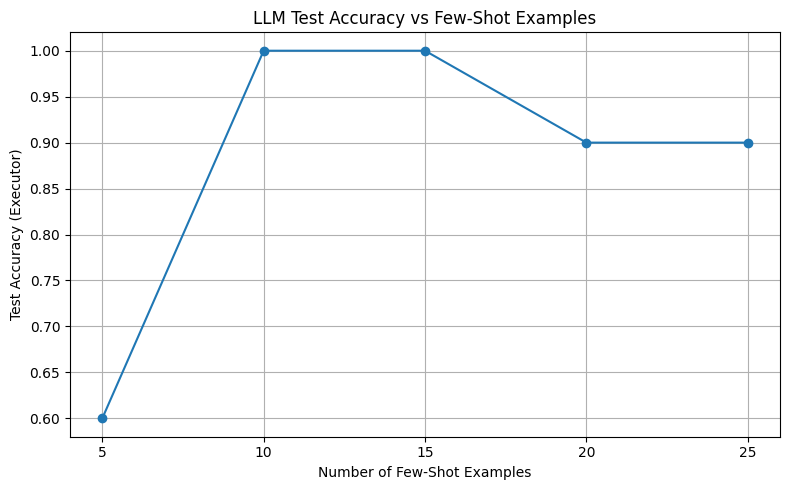

In [15]:
# ===== Plot =====
plt.figure(figsize=(8, 5))
plt.plot(shots_range, accuracies, marker='o')
plt.xticks(shots_range)
plt.xlabel("Number of Few-Shot Examples")
plt.ylabel("Test Accuracy (Executor)")
plt.title("LLM Test Accuracy vs Few-Shot Examples")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Comparision approach
you need use some scores for comparision two sequences: Ground truth programs and the output program of the LLM. There are many approaches to calculate the similirity between two sequences. Here, you can use complete match or BLEU. 

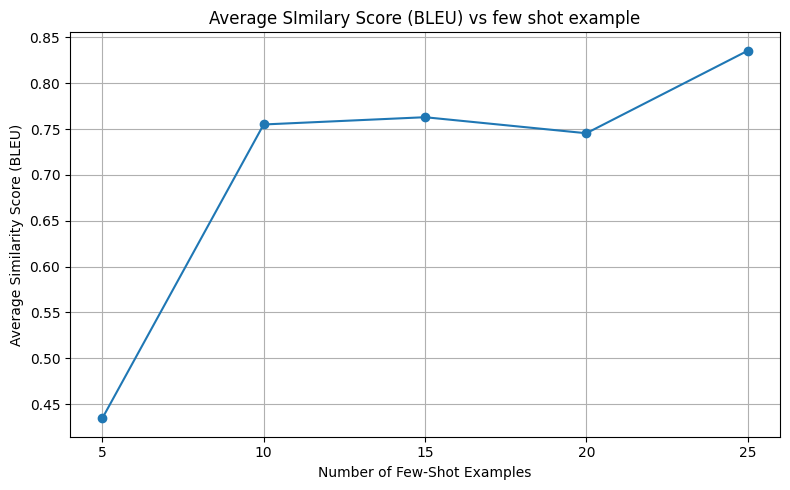

In [17]:
# ===== Plot =====
plt.figure(figsize=(8, 5))
plt.plot(shots_range, avg_score_list, marker='o')
plt.xticks(shots_range)
plt.xlabel("Number of Few-Shot Examples")
plt.ylabel("Average Similarity Score (BLEU)")
plt.title("Average SImilary Score (BLEU) vs few shot example")
plt.grid(True)
plt.tight_layout()
plt.show()